# **[Term Project] ÏûêÎèôÏ∞® ÏÉùÏÇ∞ Í≥µÏ†ï Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÏùÑ ÌÜµÌïú ÏÉùÏÇ∞ÏÑ± Í∞úÏÑ† Î∞©Ïïà ÎèÑÏ∂ú**

# 1. Î¨∏Ï†ú Ï†ïÏùò

* Ï†úÏ°∞ Í≥µÏ†ï Îç∞Ïù¥ÌÑ∞Î•º Í∏∞Î∞òÏúºÎ°ú ÏÉùÏÇ∞ÏÑ± Ìñ•ÏÉÅÏóê ÎØ∏ÏπòÎäî Ïú†ÏùòÎØ∏Ìïú Î≥ÄÏàòÎ•º ÌôïÏù∏ÌïúÎã§

# 2. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ

## 1) Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [ ]:
from google.colab import output

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ïπò
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

output.clear()

# ÏÑ§Ïπò ÌõÑ Î∞òÎìúÏãú Îü∞ÌÉÄÏûÑ Ïû¨ÏãúÏûë ÌïÑÏöî
! kill -9 $(ps -A | grep python | awk '{print $1}')

In [1]:
from google.colab import output
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from natsort import natsorted
import pandas as pd
import numpy as np

!gdown 1AX7tq815PP3FHIBrZZgYJZAt42cAAucf # process.xlsx
!gdown 13fUZ_74qQ9b1KhIlVRU7KuDygxCW6Nxa # worker.xlsx

output.clear()

In [2]:
plt.rc('font', family='NanumBarunGothic') # Colab
# plt.rc('font', family='AppleGothic') # Local : Mac
sns.set(font="NanumBarunGothic", rc={"axes.unicode_minus":False}, style='white')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
pd.set_option('display.max_columns', None)
path = '/content/drive/MyDrive/PortFolio'
import os

process_df = pd.read_excel(os.path.join(path, 'process.xlsx'))
worker_df = pd.read_excel(os.path.join(path, 'worker.xlsx'))
data = pd.merge(process_df, worker_df, left_on='ÏûëÏóÖÏûê_ÏÇ¨Î≤à', right_on='ÏÇ¨Î≤à', how='left')

## 2) Data dictionary

| Î≥ÄÏàòÎ™Ö | Ï†ïÏùò | Ïú†Ìòï | ÏÑ§Î™Ö |
| --- | --- | --- | --- |
| ÏÑ§ÎπÑ | ÏûëÏóÖÏù¥ ÏßÑÌñâÎêú ÏÑ§ÎπÑ | str | LINE_A, LINE_B, LINE_C |
| Í∑ºÎ¨¥Ï°∞ | ÍµêÎåÄÍ∑ºÎ¨¥Ïóê Îî∞Î•∏ Í∑ºÎ¨¥Ï°∞ | str | ÏïºÍ∞Ñ, Ï£ºÍ∞Ñ |
| Î™®Îç∏ | ÏÉùÏÇ∞ Î™®Îç∏ | str | ÎãàÎ°ú, ÏÜåÎÇòÌÉÄ, ÏïÑÎ∞òÎñº, ÏïÑÏù¥Ïò§Îãâ, Ìà¨Ïãº, ÌîåÎü¨Í∑∏Ïù∏Ìà¨Ïãº |
| ÏÉùÏÇ∞ÏàòÎüâ | ÏÉùÏÇ∞ ÏàòÎüâ | int | Ìï¥Îãπ Í∑ºÎ¨¥Ï°∞Ïùò ÏÉùÏÇ∞Îüâ |
| Í∞ÄÎèôÎ•† | $\frac{Í∞ÄÎèôÏãúÍ∞Ñ}{Ï°∞ÏóÖÏãúÍ∞Ñ}$ | float | Ï†ÑÏ≤¥ Ï°∞ÏóÖÏãúÍ∞Ñ Ï§ë ÏÑ§ÎπÑÍ∞Ä Ïã§Ï†úÎ°ú Í∞ÄÎèôÎêú Í∞ÄÎèôÏãúÍ∞ÑÏùò ÎπÑÏú® |
| ÏãúÍ∞ÑÍ∞ÄÎèôÎ•† | $\frac{Í∞ÄÎèôÏãúÍ∞Ñ}{Î∂ÄÌïòÏãúÍ∞Ñ}$ | float | Î∂ÄÌïòÏãúÍ∞Ñ Ï§ë ÏÑ§ÎπÑÏùò Í≥†Ïû• Ï†ïÏßÄ, Í∏∞Ï¢Ö Î≥ÄÍ≤Ω, ÏûêÏû¨ ÌíàÏ†à, Ïú†Ïã§ Í∏∞Í∞Ñ Îì±Ïùò Ï†ïÏßÄÏãúÍ∞ÑÏùÑ Ï†úÏô∏Ìïú Í∞ÄÎèôÏãúÍ∞ÑÍ≥º Î∂ÄÌïòÏãúÍ∞ÑÏùò ÎπÑÏú®Î°ú, ÏÑ§ÎπÑÍ∞Ä Ï†ïÏßÄ ÏóÜÏù¥ Í∞ÄÎèôÎêòÍ≥† ÏûàÎäîÍ∞ÄÎ•º ÎÇòÌÉÄÎÇ¥Îäî ÏßÄÌëú |
| ÏÑ±Îä•Í∞ÄÎèôÎ•† | $\frac{ÏÉùÏÇ∞Îüâ \times Îã®ÏúÑÏÉùÏÇ∞ÏãúÍ∞Ñ}{Í∞ÄÎèôÏãúÍ∞Ñ}$ | float | (ÏÉùÏÇ∞Îüâ x Ïù¥Î°†Ï†Å Îã®ÏúÑÏÉùÏÇ∞ÏãúÍ∞Ñ)/Í∞ÄÎèôÏãúÍ∞Ñ ÏúºÎ°ú, Í∞ÄÎèôÏãúÍ∞Ñ Ï§ë ÏÑ§ÎπÑ Î™©Ìëú ÏÑ±Îä•ÏùÑ Î∞úÌúòÌïú ÏãúÍ∞ÑÏùò ÎπÑÏú® |
| Î∂àÎüâÏàòÎüâ | ÏÉùÏÇ∞ ÏàòÎüâ Ï§ë Î∂àÎüâ ÏàòÎüâ | int |  |
| ÏûëÏóÖÏûê_ÏÇ¨Î≤à | ÏûëÏóÖÏûê ÏÇ¨Î≤à | int |  |
| ÏÇ¨Î≤à | ÏûëÏóÖÏûê ÏÇ¨Î≤à | int |  |
| ÏÑ±Î™Ö | ÏûëÏóÖÏûê ÏÑ±Î™Ö | str |  |
| ÎÇòÏù¥ | ÏûëÏóÖÏûê ÎÇòÏù¥ | int |  |
| ÏÑ±Î≥Ñ | ÏûëÏóÖÏûê ÏÑ±Î≥Ñ | str | ÎÇ®, Ïó¨ |
| ÏµúÏ¢ÖÌïôÎ†• | ÏûëÏóÖÏûê ÏµúÏ¢ÖÌïôÎ†• | str | Í≥†Îì±ÌïôÍµê, Ï†ÑÎ¨∏ÎåÄÌïô, ÎåÄÌïô |
| ÏûÖÏÇ¨ÏùºÏûê | ÏûëÏóÖÏûê ÏûÖÏÇ¨ÏùºÏûê | date | Ïó∞-Ïõî-Ïùº |




- Ï°∞ÏóÖÏãúÍ∞Ñ
    - 1Ïùº Í∑ºÎ¨¥ÏãúÍ∞ÑÏùÑ Í∏∞Ï¥àÎ°ú ÌïòÎ£®Ïùò ÏãúÏóÖ ÏãúÍ∞ÑÍ≥º Ï¢ÖÏóÖ ÏãúÍ∞Ñ ÏÇ¨Ïù¥Ïùò Ï¥ù ÏãúÍ∞Ñ
    - Ìú¥Ïãù, ÏãùÏÇ¨ ÏàòÏ£ºÎ¨ºÎüâ Î∂ÄÏ°± Îì± `Í≥ÑÌöçÏ†ïÏßÄÏãúÍ∞Ñ`ÏùÑ Ìè¨Ìï®
- Î∂ÄÌïòÏãúÍ∞Ñ
    - `Î∂ÄÌïòÏãúÍ∞Ñ`=`Ï°∞ÏóÖÏãúÍ∞Ñ` - `Í≥ÑÌöçÏ†ïÏßÄÏãúÍ∞Ñ`
    - `Ï°∞ÏóÖÏãúÍ∞Ñ`ÏóêÏÑú `Í≥ÑÌöçÏ†ïÏßÄÏãúÍ∞Ñ`ÏùÑ Ï†úÏô∏ÌïòÍ≥† ÏÑ§ÎπÑÍ∞Ä Ï†ïÏÉÅÏ†ÅÏù∏ ÏÉÅÌÉúÏóêÏÑú Ïã§Ï†úÎ°ú Í∞ÄÎèôÎêòÏñ¥Ïïº Ìï† ÏãúÍ∞Ñ
- Í∞ÄÎèôÏãúÍ∞Ñ
    - `Í∞ÄÎèôÏãúÍ∞Ñ` = `Î∂ÄÌïòÏãúÍ∞Ñ` - `Ï†ïÏßÄÏãúÍ∞Ñ`
    - ÏÑ§ÎπÑÏùò `Î∂ÄÌïòÏãúÍ∞Ñ`ÏóêÏÑú `Ï†ïÏßÄÏãúÍ∞Ñ`ÏùÑ Ï†úÏô∏Ìïú ÏãúÍ∞ÑÏúºÎ°ú, ÏÑ§ÎπÑÍ∞Ä Ïã§Ï†ú Í∞ÄÎèôÌïú ÏãúÍ∞ÑÏùÑ ÏùòÎØ∏Ìï®.
    - `Ï†ïÏßÄÏãúÍ∞Ñ`Ïù¥ÎûÄ ÎπÑÍ≥ÑÌöçÏ†ÅÏúºÎ°ú ÏÑ§ÎπÑÏùò ÏûëÎèôÏù¥ Ï†ïÏßÄÎêú ÏãúÍ∞ÑÏúºÎ°ú ÏÑ§ÎπÑÍ∞Ä 5Î∂Ñ Ïù¥ÏÉÅ Í∞ÄÎèôÌïòÏßÄ ÏïäÏùÄ ÏãúÍ∞ÑÏùÑ ÏùòÎØ∏Ìï®.

### (1) Îç∞Ïù¥ÌÑ∞ Í∏∞Î≥∏Ï†ïÎ≥¥ ÌôïÏù∏

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2192 entries, 0 to 2191
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ÏûëÏóÖÏùºÏûê    2192 non-null   datetime64[ns]
 1   ÏÑ§ÎπÑ      2192 non-null   object        
 2   Í∑ºÎ¨¥Ï°∞     2192 non-null   object        
 3   Î™®Îç∏      2192 non-null   object        
 4   ÏÉùÏÇ∞ÏàòÎüâ    1646 non-null   float64       
 5   Í∞ÄÎèôÎ•†     1646 non-null   float64       
 6   ÏãúÍ∞ÑÍ∞ÄÎèôÎ•†   1646 non-null   float64       
 7   ÏÑ±Îä•Í∞ÄÎèôÎ•†   1646 non-null   float64       
 8   Î∂àÎüâÏàòÎüâ    1646 non-null   float64       
 9   ÏûëÏóÖÏûê_ÏÇ¨Î≤à  1646 non-null   float64       
 10  ÏÇ¨Î≤à      1646 non-null   float64       
 11  ÏÑ±Î™Ö      1646 non-null   object        
 12  ÎÇòÏù¥      1646 non-null   float64       
 13  ÏÑ±Î≥Ñ      1646 non-null   object        
 14  ÏµúÏ¢ÖÌïôÎ†•    1646 non-null   object        
 15  ÏûÖÏÇ¨ÏùºÏûê    1646 non-null   object    

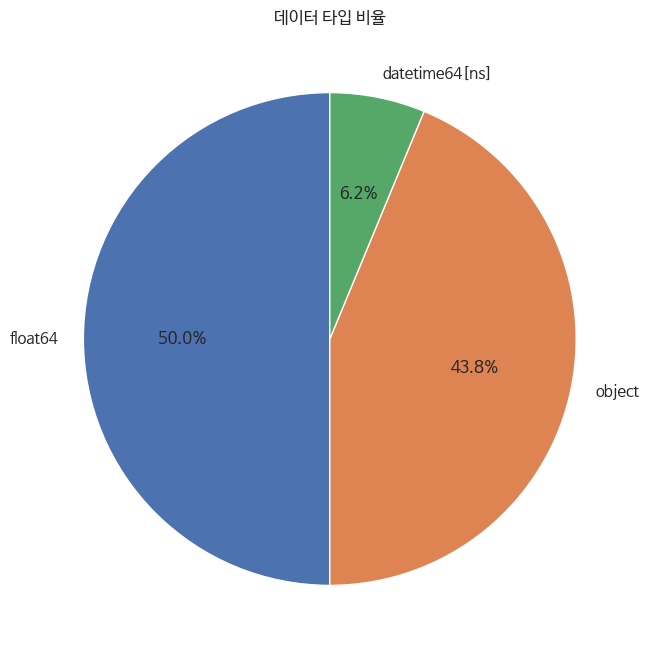

In [ ]:
# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ÎπÑÏú® Í≥ÑÏÇ∞
dtype_counts = data.dtypes.value_counts()

# ÌååÏù¥Ï∞®Ìä∏ ÏÉùÏÑ±
plt.figure(figsize=(8, 8))
plt.pie(dtype_counts, labels=dtype_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ ÎπÑÏú®')
plt.show()

### (2) Í≤∞Ï∏°Ïπò ÌôïÏù∏

***`ÏûëÏóÖÏùºÏûê, ÏÑ§ÎπÑ, Í∑ºÎ¨¥Ï°∞, Î™®Îç∏`ÏùÑ Ï†úÏô∏Ìïú Î™®Îì† ÏπºÎüºÏóêÏÑú Í≤∞Ï∏°ÏπòÍ∞Ä 546Í∞úÏî© ÏûàÎäîÍ≤ÉÏùÑ ÌôïÏù∏***

In [ ]:
data.isnull().sum()

ÏûëÏóÖÏùºÏûê        0
ÏÑ§ÎπÑ          0
Í∑ºÎ¨¥Ï°∞         0
Î™®Îç∏          0
ÏÉùÏÇ∞ÏàòÎüâ      546
Í∞ÄÎèôÎ•†       546
ÏãúÍ∞ÑÍ∞ÄÎèôÎ•†     546
ÏÑ±Îä•Í∞ÄÎèôÎ•†     546
Î∂àÎüâÏàòÎüâ      546
ÏûëÏóÖÏûê_ÏÇ¨Î≤à    546
ÏÇ¨Î≤à        546
ÏÑ±Î™Ö        546
ÎÇòÏù¥        546
ÏÑ±Î≥Ñ        546
ÏµúÏ¢ÖÌïôÎ†•      546
ÏûÖÏÇ¨ÏùºÏûê      546
dtype: int64

<Figure size 1000x500 with 0 Axes>

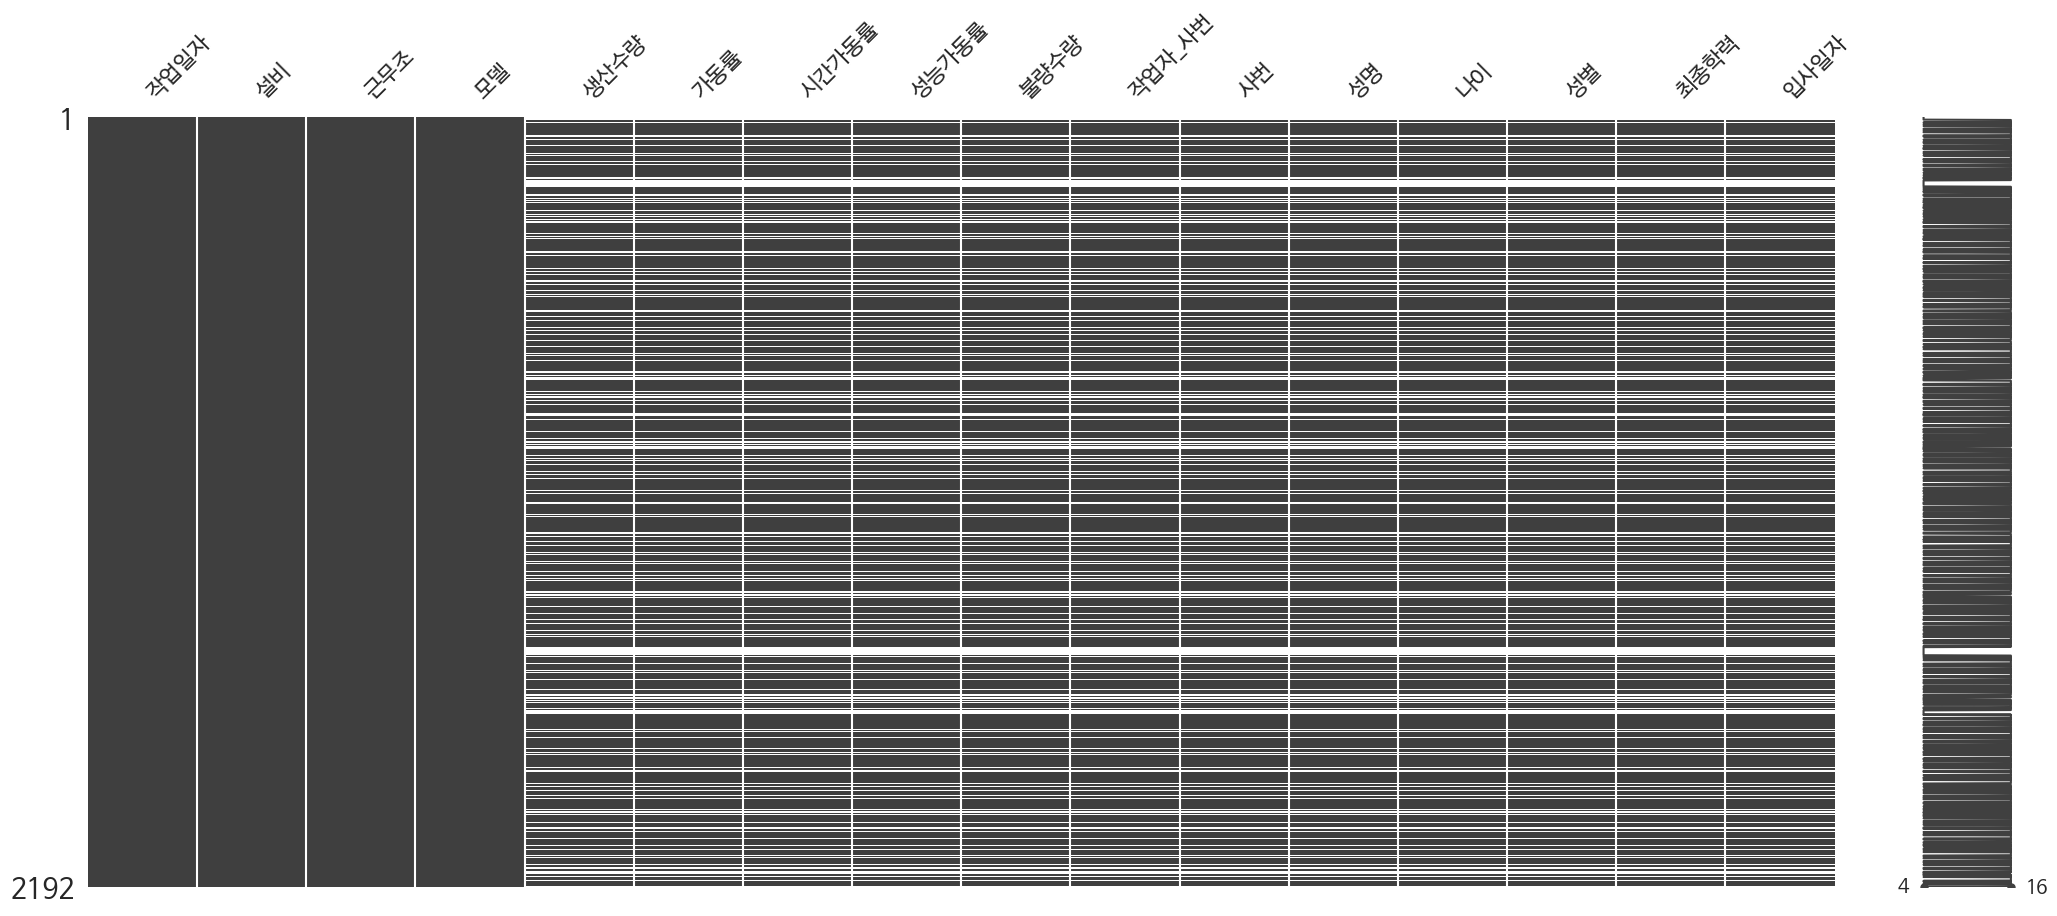

In [ ]:
try:
    import missingno as msno

except:
    !pip install missingno
    import missingno as msno

import seaborn as sns
#sns.set(font="NanumBarunGothic", # Colab
#        rc={"axes.unicode_minus":False}) # Colab
plt.figure(figsize=(10, 5))
msno.matrix(data.sort_values('ÏûëÏóÖÏùºÏûê'))
plt.show()

# Ìù∞ÏÉâ Í∞ÄÎ°úÏÑ† : Í≤∞Ï∏°Ïπò

In [ ]:
# Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî column filtering
missing_col = data.isnull().sum()[data.isnull().sum().values > 0].index.tolist()
print(missing_col)

for col in missing_col:
    is_same = data['ÏÉùÏÇ∞ÏàòÎüâ'].isnull().tolist() == data[col].isnull().tolist()
    print(is_same)

['ÏÉùÏÇ∞ÏàòÎüâ', 'Í∞ÄÎèôÎ•†', 'ÏãúÍ∞ÑÍ∞ÄÎèôÎ•†', 'ÏÑ±Îä•Í∞ÄÎèôÎ•†', 'Î∂àÎüâÏàòÎüâ', 'ÏûëÏóÖÏûê_ÏÇ¨Î≤à', 'ÏÇ¨Î≤à', 'ÏÑ±Î™Ö', 'ÎÇòÏù¥', 'ÏÑ±Î≥Ñ', 'ÏµúÏ¢ÖÌïôÎ†•', 'ÏûÖÏÇ¨ÏùºÏûê']
True
True
True
True
True
True
True
True
True
True
True
True


***üëâ  Î™®Îì† ÏπºÎüºÏùò ÎèôÏùºÌïú ÌñâÏóê Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÏùåÏùÑ ÌôïÏù∏Ìï®***

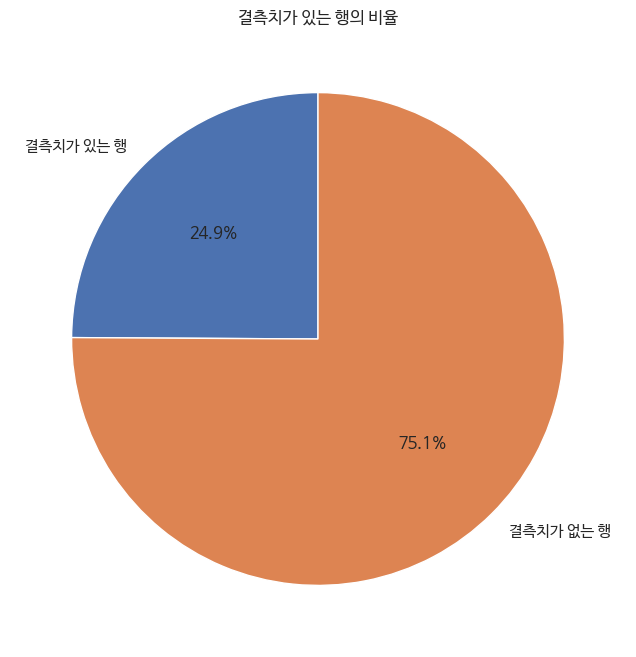

In [ ]:
# Í≤∞Ï∏°Ïπò ÎπÑÏú® ÌôïÏù∏

# Í∞Å ÌñâÏóê ÎåÄÌïú Í≤∞Ï∏°Ïπò Ïó¨Î∂Ä ÌôïÏù∏
missing_rows = data.isnull().any(axis=1)

# Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî ÌñâÏùò ÎπÑÏú® Í≥ÑÏÇ∞
missing_rows_percentage = (missing_rows.sum() / len(data)) * 100

# ÌååÏù¥Ï∞®Ìä∏ ÏÉùÏÑ±
plt.figure(figsize=(8, 8))
plt.pie([missing_rows_percentage, 100 - missing_rows_percentage], labels=['Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî Ìñâ', 'Í≤∞Ï∏°ÏπòÍ∞Ä ÏóÜÎäî Ìñâ'],
        autopct='%1.1f%%', startangle=90)
plt.title('Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî ÌñâÏùò ÎπÑÏú®')
plt.show()


***Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ : Missing Value(Í≤∞Ï∏°Ïπò)***
* Î™®Îì† Í∞íÏùÑ Îã®ÏàúÌûà imputation(mean, mode, min, max) ÌïòÍ∏∞ÏóêÎäî ÏïΩ 25%Î°ú Îç∞Ïù¥ÌÑ∞Ïóê ÌÅ∞ ÏôúÍ≥°Ïù¥ Î∞úÏÉùÌï† Í≤ÉÏúºÎ°ú ÏòàÏÉÅÎê®
* Îî∞ÎùºÏÑú drop ÏãúÌÇ§Îäî Í≤ÉÏù¥ ÏµúÏÑ†Ïùº Í≤ÉÏúºÎ°ú ÌåêÎã®

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

### 1) Í≤∞Ï∏°Ïπò Ï†úÍ±∞


In [6]:
data = data.dropna(axis=0)

### 2) Í≤πÏπòÎäî Î≥ÄÏàò Ï†úÍ±∞

***`ÏûëÏóÖÏûê_ÏÇ¨Î≤à`, `ÏÇ¨Î≤à`ÏùÄ ÎèôÏùºÌïú dataÎ•º Í∞ÄÏßÄÍ≥† ÏûàÎäî ÏπºÎüºÏúºÎØÄÎ°ú 1Í∞ú(`ÏûëÏóÖÏûê_ÏÇ¨Î≤à`) ÏÇ≠Ï†ú Ìï®***

In [7]:
data.drop(['ÏûëÏóÖÏûê_ÏÇ¨Î≤à'], axis=1, inplace=True)

### 3) Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Î≥ÄÌôò

1. ÏÇ¨Î≤à : float -> int

2. ÎÇòÏù¥ : float -> int

In [8]:
# Í≤∞Ï∏°Ïπò(Nan)Îäî intÎ°ú Î≥ÄÌôòÏù¥ ÏïàÎêòÎØÄÎ°ú Í≤∞Ï∏°ÏπòÍ∞Ä ÏïÑÎãå rowÎì§ÏùÑ Î∂àÎü¨ÏôÄ Î≥ÄÌôò

data['ÏÇ¨Î≤à'] = data['ÏÇ¨Î≤à'].astype(int)
data['ÎÇòÏù¥'] = data['ÎÇòÏù¥'].astype(int)

In [9]:
data[['ÏÇ¨Î≤à', 'ÎÇòÏù¥']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1646 entries, 8 to 2191
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ÏÇ¨Î≤à      1646 non-null   int64
 1   ÎÇòÏù¥      1646 non-null   int64
dtypes: int64(2)
memory usage: 38.6 KB


üëâ float >>> int Î≥ÄÍ≤Ω ÌôïÏù∏

### 4) datetime64 Î∂ÑÌï†

***ÏûëÏóÖÏùºÏûê, ÏûÖÏÇ¨ÏùºÏûê : datetime64 üëâ ÎÖÑ, Ïõî, Ïùº Î≥Ñ Î∂ÑÏÑùÏù¥ Í∞ÄÎä•ÌïòÎèÑÎ°ù Î∂ÑÌï†***

In [10]:
# Î∂ÑÌï† : year, month, day

data['ÏûëÏóÖÏùºÏûê_year'] = data['ÏûëÏóÖÏùºÏûê'].dt.year
data['ÏûëÏóÖÏùºÏûê_month'] = data['ÏûëÏóÖÏùºÏûê'].dt.month
data['ÏûëÏóÖÏùºÏûê_day'] = data['ÏûëÏóÖÏùºÏûê'].dt.day

data[['ÏûëÏóÖÏùºÏûê_year', 'ÏûëÏóÖÏùºÏûê_month', 'ÏûëÏóÖÏùºÏûê_day']].head()

ÏûëÏóÖÏùºÏûê_year  ÏûëÏóÖÏùºÏûê_month  ÏûëÏóÖÏùºÏûê_day
8        2022           1         2
9        2022           1         2
10       2022           1         2
11       2022           1         2
12       2022           1         3

***`ÏûÖÏÇ¨ÏùºÏûê`Îäî ÌòÑÏû¨ object typeÏù∏ Í≤ÉÏùÑ ÌôïÏù∏ üëâ datetime64 typeÏúºÎ°ú Î≥ÄÌôò ÌõÑ Î∂ÑÌï† ÏßÑÌñâ***

In [11]:
# ÌòÑÏû¨ objectÏûÑ

print(f'type : {data["ÏûÖÏÇ¨ÏùºÏûê"]}')

type : 8        1993-1-16
9         2018-6-1
10       1996-4-18
11       2014-4-20
12       2014-6-26
           ...    
2185     2018-6-26
2188     1993-9-17
2189    2008-11-30
2190     2018-6-26
2191     2001-3-23
Name: ÏûÖÏÇ¨ÏùºÏûê, Length: 1646, dtype: object


In [12]:
# object -> datetime64ÏúºÎ°ú Î≥ÄÌôòÎêú Í≤ÉÏùÑ ÌôïÏù∏

data["ÏûÖÏÇ¨ÏùºÏûê"] = pd.to_datetime(data["ÏûÖÏÇ¨ÏùºÏûê"], format='%Y-%m-%d')

# Î∂ÑÌï† : year, month, day

data['ÏûÖÏÇ¨ÏùºÏûê_year'] = data['ÏûÖÏÇ¨ÏùºÏûê'].dt.year
data['ÏûÖÏÇ¨ÏùºÏûê_month'] = data['ÏûÖÏÇ¨ÏùºÏûê'].dt.month
data['ÏûÖÏÇ¨ÏùºÏûê_day'] = data['ÏûÖÏÇ¨ÏùºÏûê'].dt.day

data[['ÏûÖÏÇ¨ÏùºÏûê_year', 'ÏûÖÏÇ¨ÏùºÏûê_month', 'ÏûÖÏÇ¨ÏùºÏûê_day']][-5:]

ÏûÖÏÇ¨ÏùºÏûê_year  ÏûÖÏÇ¨ÏùºÏûê_month  ÏûÖÏÇ¨ÏùºÏûê_day
2185       2018           6        26
2188       1993           9        17
2189       2008          11        30
2190       2018           6        26
2191       2001           3        23

### 5) Ïù¥ÏÉÅÏπò ÌôïÏù∏ Î∞è Ï†úÍ±∞

***Column Î≥Ñ Ïù¥ÏÉÅÏπò Ï°¥Ïû¨ ÌôïÏù∏***

***Column*** : ÏÑ§ÎπÑ, Í∑ºÎ¨¥Ï°∞, Î™®Îç∏, ÏÉùÏÇ∞ÏàòÎüâ, Í∞ÄÎèôÎ•†, ÏãúÍ∞ÑÍ∞ÄÎèôÎ•†, ÏÑ±Îä•Í∞ÄÎèôÎ•†, Î∂àÎüâÏàòÎüâ, ÏÇ¨Î≤à, ÏÑ±Î™Ö, ÎÇòÏù¥, ÏÑ±Î≥Ñ, ÏµúÏ¢ÖÌïôÎ†•, ÏûÖÏÇ¨ÏùºÏûê

***(1) ÏÑ§ÎπÑ***

In [13]:
data['ÏÑ§ÎπÑ'].value_counts()

LINE_C    699
LINE_B    698
LINE_A    249
Name: ÏÑ§ÎπÑ, dtype: int64

***(2) Í∑ºÎ¨¥Ï°∞***

In [14]:
data['Í∑ºÎ¨¥Ï°∞'].value_counts()

Ï£ºÍ∞Ñ    948
ÏïºÍ∞Ñ    698
Name: Í∑ºÎ¨¥Ï°∞, dtype: int64

***(3) Î™®Îç∏***

In [15]:
data['Î™®Îç∏'].value_counts()

Ìà¨Ïãº         616
ÌîåÎü¨Í∑∏Ïù∏Ìà¨Ïãº     442
ÏïÑÎ∞òÎñº        262
ÏïÑÏù¥Ïò§Îãâ       249
ÌîåÎü¨Í∑∏Ïù∏ Ìà¨Ïãº     44
ÏÜåÎÇòÌÉÄ         28
ÎãàÎ°ú           5
Name: Î™®Îç∏, dtype: int64

In [16]:
# 'ÌîåÎü¨Í∑∏Ïù∏Ìà¨Ïãº' / 'ÌîåÎü¨Í∑∏Ïù∏ Ìà¨Ïãº' => 'ÌîåÎü¨Í∑∏Ïù∏Ìà¨Ïãº' ÏúºÎ°ú ÌÜµÏùºÌï¥Ï£ºÍ∏∞

old_word = 'ÌîåÎü¨Í∑∏Ïù∏ Ìà¨Ïãº'
new_word = 'ÌîåÎü¨Í∑∏Ïù∏Ìà¨Ïãº'

data['Î™®Îç∏'] = data['Î™®Îç∏'].replace(old_word, new_word, regex=True)

***(4) ÏÉùÏÇ∞ÏàòÎüâ***

<Axes: ylabel='Frequency'>

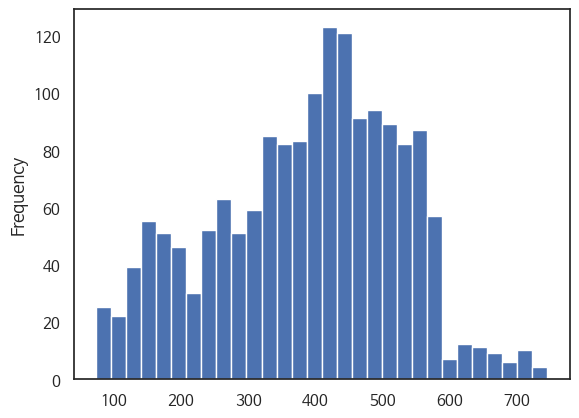

In [17]:
data['ÏÉùÏÇ∞ÏàòÎüâ'].plot.hist(bins=30)

***(5) Í∞ÄÎèôÎ•†***

<Axes: ylabel='Frequency'>

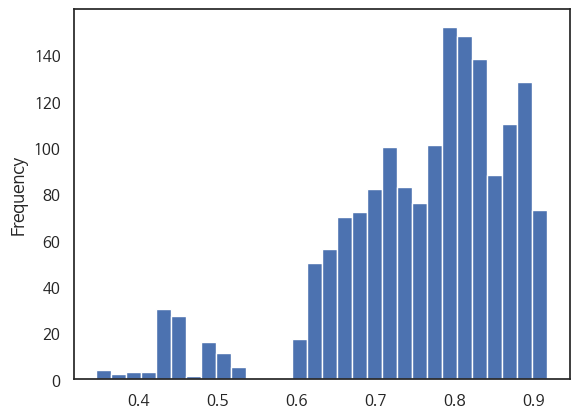

In [18]:
data['Í∞ÄÎèôÎ•†'].plot.hist(bins=30)

***(6) ÏãúÍ∞ÑÍ∞ÄÎèôÎ•†***

<Axes: ylabel='Frequency'>

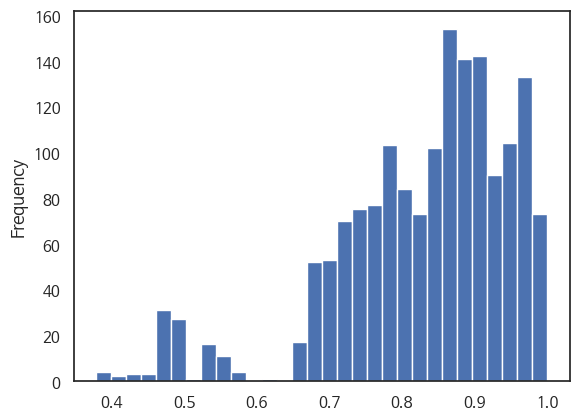

In [19]:
data['ÏãúÍ∞ÑÍ∞ÄÎèôÎ•†'].plot.hist(bins=30)

***(7) ÏÑ±Îä•Í∞ÄÎèôÎ•†***

<Axes: ylabel='Frequency'>

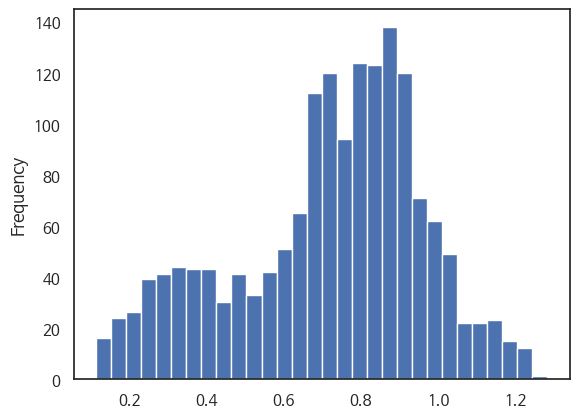

In [20]:
data['ÏÑ±Îä•Í∞ÄÎèôÎ•†'].plot.hist(bins=30)

***(8) Î∂àÎüâÏàòÎüâ***

<Axes: ylabel='Frequency'>

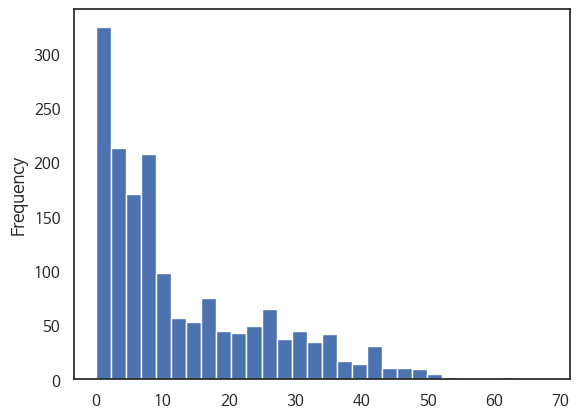

In [21]:
data['Î∂àÎüâÏàòÎüâ'].plot.hist(bins=30)

***(9) ÏÇ¨Î≤à***

<Axes: ylabel='Frequency'>

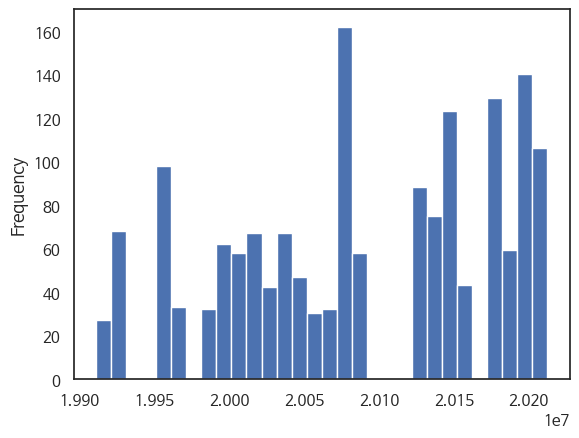

In [22]:
data['ÏÇ¨Î≤à'].plot.hist(bins=30)

***(10) ÏÑ±Î™Ö***

In [23]:
data['ÏÑ±Î™Ö'].value_counts

<bound method IndexOpsMixin.value_counts of 8       Ïú§ÏßÄÌõÑ
9       Í∞ïÏ£ºÏõê
10      ÏµúÎØºÍ∑ú
11      Ï†ïÏãúÌõÑ
12      ÏÜêÏßÄÏö∞
       ... 
2185    Ïù¥ÎèÑÏú§
2188    Ïù¥Ïù¥Ïïà
2189    Ï†ïÏäπÎØº
2190    Ïù¥ÎèÑÏú§
2191    ÌôçÌòÑÏ§Ä
Name: ÏÑ±Î™Ö, Length: 1646, dtype: object>

***(11) ÎÇòÏù¥***

<Axes: ylabel='Frequency'>

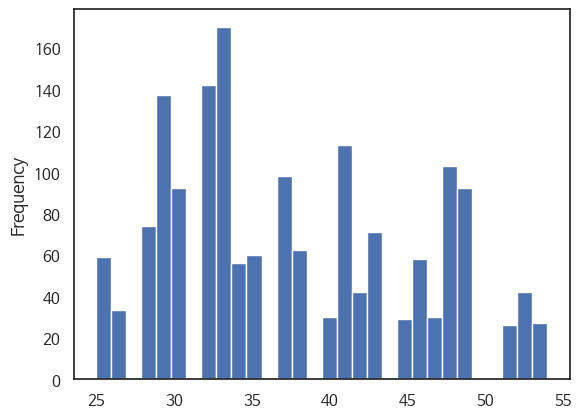

In [24]:
data['ÎÇòÏù¥'].plot.hist(bins=30)

***(12) ÏÑ±Î≥Ñ***

In [25]:
data['ÏÑ±Î≥Ñ'].value_counts()

ÎÇ®    1053
Ïó¨     593
Name: ÏÑ±Î≥Ñ, dtype: int64

***(13) ÏµúÏ¢ÖÌïôÎ†•***

In [26]:
data['ÏµúÏ¢ÖÌïôÎ†•'].value_counts()

Í≥†Îì±ÌïôÍµê    752
Ï†ÑÎ¨∏ÎåÄÌïô    460
ÎåÄÌïô      434
Name: ÏµúÏ¢ÖÌïôÎ†•, dtype: int64

***(14) ÏûÖÏÇ¨ÏùºÏûê***

In [27]:
data['ÏûÖÏÇ¨ÏùºÏûê'].value_counts()

2000-07-27    62
2005-05-13    47
2020-11-03    47
2015-08-08    43
2003-05-07    42
1993-01-16    42
2014-06-26    40
2019-05-12    40
2020-03-11    40
1996-06-22    39
2018-07-07    39
2001-03-23    38
2008-10-22    38
2007-03-11    36
2013-05-22    35
2014-07-20    34
2018-06-01    34
2004-06-01    34
2007-08-06    34
2018-11-16    34
1995-02-19    34
2020-02-21    33
1996-04-18    33
2003-10-22    33
2018-11-17    32
2021-09-26    32
2013-12-17    32
1998-06-09    32
2006-07-12    32
2009-06-20    32
2015-01-28    30
2015-09-29    30
2006-02-24    30
2001-09-21    29
2001-06-18    29
2014-04-20    29
2001-07-01    29
2013-04-08    28
2013-07-11    28
2008-11-30    28
2021-01-28    27
2020-04-28    27
1991-01-03    27
1993-09-17    26
2007-04-30    26
2008-07-15    26
2019-09-29    25
1995-12-23    25
2018-06-26    24
Name: ÏûÖÏÇ¨ÏùºÏûê, dtype: int64

* ***Í∞ÑÎã®Ìïú ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌï¥ ÌôïÏù∏Ìï¥Î≥∏ Í≤∞Í≥º ÏùºÍ¥ÄÏÑ± Ï∞®ÏõêÏùò Ïù¥ÏÉÅÏπòÎäî Ï°¥Ïû¨ÌïòÏßÄ ÏïäÎäî Í≤ÉÏúºÎ°ú ÌåêÎã®ÌñàÏäµÎãàÎã§.***

### 6) ÌååÏÉùÎ≥ÄÏàò

* Í∑ºÏÜçÎÖÑÏàò : ÏûëÏóÖÏùºÏûê_year - ÏûÖÏÇ¨ÏùºÏûê_year
* Î∂àÎüâÎ•† : Î∂àÎüâÏàòÎüâ / ÏÉùÏÇ∞ÏàòÎüâ

In [28]:
data['Í∑ºÏÜçÎÖÑÏàò'] = (data['ÏûëÏóÖÏùºÏûê_year'] - data['ÏûÖÏÇ¨ÏùºÏûê_year']).astype(int)
data['Î∂àÎüâÎ•†'] = data['Î∂àÎüâÏàòÎüâ'] / data['ÏÉùÏÇ∞ÏàòÎüâ']

* ÎÇòÏù¥ : 5ÏÇ¥ Îã®ÏúÑÎ°ú Íµ¨Í∞ÑÌôî ÏßÑÌñâ
* Í∑ºÏÜçÎÖÑÏàò : 5ÎÖÑ Îã®ÏúÑÎ°ú Íµ¨Í∞ÑÌôî ÏßÑÌñâ

In [29]:
bined_age = list()

for age in data['ÎÇòÏù¥']:

    if age < 30:
        bined_age.append('25~29ÏÇ¥')
    elif age < 35:
        bined_age.append('30~34ÏÇ¥')
    elif age < 40:
        bined_age.append('35~39ÏÇ¥')
    elif age < 45:
        bined_age.append('40~44ÏÇ¥')
    elif age < 50:
        bined_age.append('45~49ÏÇ¥')
    elif age < 55:
        bined_age.append('50~54ÏÇ¥')
    else:
        bined_age.append(np.nan)

data['bined_ÎÇòÏù¥'] = bined_age


work_year = list()

for wy in data['Í∑ºÏÜçÎÖÑÏàò']:

    if wy < 5:
        work_year.append('00~04ÎÖÑ')
    elif wy < 10:
        work_year.append('05~09ÎÖÑ')
    elif wy < 15:
        work_year.append('10~14ÎÖÑ')
    elif wy < 20:
        work_year.append('15~19ÎÖÑ')
    elif wy < 25:
        work_year.append('20~24ÎÖÑ')
    else:
        work_year.append('25 ÎÖÑ Ïù¥ÏÉÅ')

data['bined_Í∑ºÏÜçÎÖÑÏàò'] = work_year

# 3. EDA

***Î™©Ìëú***
1. ÏÑ±Îä•ÏùÑ ÎÇòÌÉÄÎÇ¥Îäî Î≥ÄÏàòÎì§Í≥º Í∑∏ Ïô∏ Î≥ÄÏàòÎì§ Í∞ÑÏùò Ïú†ÏùòÎØ∏Ìïú Í¥ÄÍ≥Ñ ÌôïÏù∏
2. Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäî ÌñâÏùÄ Ï†úÍ±∞ÌïòÍ≥† EDA ÏàòÌñâ
3. Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨Î•º ÏÇ¥Ìé¥Î≥∏ ÌõÑ Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÌåêÎã®

"ÌôïÏù∏ÌïòÍ≥† Îòê ÌôïÏù∏ÌïòÎùº" -Îç∞Ïù¥ÌÑ∞ÎßàÏù¥Îãù-  
  
Îç∞Ïù¥ÌÑ∞ÎßàÏù¥Îãù ÏãúÍ∞ÅÌôî ÏàòÏóÖÏûêÎ£å : https://ink-starfish-f66.notion.site/W04-13b5c69510bb42028bfda0f16549cdfb?pvs=4

## üëâ  Í∞ÄÏÑ§


| <font size="4">**Í∞ÄÏÑ§ Î≤àÌò∏**</font> | <font size="4">**Í∞ÄÏÑ§ ÏÑ§Î™Ö**</font> | <font size="4">**ÎèÑÌëú**</font> |
| ----------------------------------- | ----------------------- | ----------------------- |
| <font size="4">ÏÉùÏÇ∞ÏàòÎüâ-1</font> |  <font size="4">ÏïÑÎ∞òÎñºÏùò ÏÉùÏÇ∞ÏàòÎüâÏùò Î∂ÑÏÇ∞Ïù¥ ÌÉÄ Î™®Îç∏Îì§Ïóê ÎπÑÌï¥ ÎÜíÏùÑ Í≤ÉÏù¥Îã§.</font> | <font size="4">EDA - ÏÉùÏÇ∞ÏàòÎüâ, Î™®Îç∏</font> |
| <font size="4">ÏÉùÏÇ∞ÏàòÎüâ-2</font> |  <font size="4">LINE_AÏóêÏÑú 22ÎÖÑ 4Ïõî 29Ïùº~22ÎÖÑ 8Ïõî 1Ïùº ÏÇ¨Ïù¥Ïóê ÌèâÍ∑† ÏÉùÏÇ∞ÏàòÎüâÏù¥ Îã§Î•∏ ÎÇ†Ïóê ÎπÑÌï¥ ÎÜíÏùÑ Í≤ÉÏù¥Îã§.</font> | <font size="4">EDA - ÏÉùÏÇ∞ÏàòÎüâ, 4Ïõî 29Ïùº ~ 8Ïõî 1Ïùº, ÏÑ§ÎπÑ(LINE_A)</font> |
| <font size="4">Î∂àÎüâÎ•†-1</font> |<font size="4">Í∑ºÏÜçÎÖÑÏàòÍ∞Ä 00-04ÎÖÑ, 25ÎÖÑ Ïù¥ÏÉÅÏù∏ Í≤ΩÏö∞ ÌèâÍ∑† Î∂àÎüâÎ•†Ïù¥ Îã§Î•∏ ÎÖÑÏàòÏóê ÎπÑÌï¥ ÎÜíÏùÑ Í≤ÉÏù¥Îã§.</font> | <font size="4">EDA - Î∂àÎüâÎ•†, Í∑ºÏÜçÎÖÑÏàò</font> |
| <font size="4">ÏãúÍ∞ÑÍ∞ÄÎèôÎ•†-1</font> | <font size="4">LINE_CÏóêÏÑú ÏÉùÏÇ∞ÏàòÎüâÏù¥ 375Í∞ú Ïù¥ÏÉÅÏùºÎïå ÏãúÍ∞ÑÍ∞ÄÎèôÎ•†Ïù¥ ÎÜíÏùÑ Í≤ÉÏù¥Îã§.</font> | <font size="4">EDA - ÏãúÍ∞ÑÍ∞ÄÎèôÎ•†, ÏÑ§ÎπÑ(LINE_C)</font> |


### 1) Í∏∞Ï¥àÌÜµÍ≥ÑÎüâ

In [30]:
data.describe()

ÏÉùÏÇ∞ÏàòÎüâ          Í∞ÄÎèôÎ•†        ÏãúÍ∞ÑÍ∞ÄÎèôÎ•†        ÏÑ±Îä•Í∞ÄÎèôÎ•†         Î∂àÎüâÏàòÎüâ  \
count  1646.000000  1646.000000  1646.000000  1646.000000  1646.000000   
mean    386.518834     0.759977     0.828975     0.715881    12.916768   
std     138.651322     0.111836     0.122146     0.246429    12.417499   
min      74.000000     0.347000     0.379000     0.113323     0.000000   
25%     289.000000     0.701559     0.765152     0.570660     3.000000   
50%     404.500000     0.785990     0.857576     0.756960     8.000000   
75%     488.000000     0.839036     0.915152     0.889597    20.000000   
max     745.000000     0.917000     1.000000     1.282272    68.000000   

                 ÏÇ¨Î≤à           ÎÇòÏù¥  ÏûëÏóÖÏùºÏûê_year   ÏûëÏóÖÏùºÏûê_month     ÏûëÏóÖÏùºÏûê_day  \
count  1.646000e+03  1646.000000     1646.0  1646.000000  1646.000000   
mean   2.008885e+07    37.544957     2022.0     6.520656    15.974484   
std    8.774901e+04     7.939749        0.0     3.439693     8.726194   
min    1.991102e+07    25.000000     2022.0     1.000000     1.000000   
25%    2.001179e+07    32.000000     2022.0     4.000000     8.000000   
50%    2.008130e+07    36.000000     2022.0     7.000000    16.000000   
75%    2.018015e+07    43.000000     2022.0    10.000000    23.000000   
max    2.021235e+07    54.000000     2022.0    12.000000    31.000000   

         ÏûÖÏÇ¨ÏùºÏûê_year   ÏûÖÏÇ¨ÏùºÏûê_month     ÏûÖÏÇ¨ÏùºÏûê_day         Í∑ºÏÜçÎÖÑÏàò          Î∂àÎüâÎ•†  
count  1646.000000  1646.000000  1646.000000  1646.000000  1646.000000  
mean   2008.722357     6.213244    16.865735    13.277643     0.033673  
std       8.759818     3.013460     8.411503     8.759818     0.028480  
min    1991.000000     1.000000     1.000000     1.000000     0.000000  
25%    2001.000000     4.000000    11.000000     4.000000     0.010063  
50%    2008.000000     6.000000    18.000000    14.000000     0.019852  
75%    2018.000000     8.000000    23.000000    21.000000     0.057650  
max    2021.000000    12.000000    30.000000    31.000000     0.100775

### 2) ÏãúÍ∞ÅÌôî

In [31]:
def make_plot_1(target_col, col):
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    mean_values = data.groupby(col)[target_col].mean()
    hue_order_ = natsorted(data[col].sort_values().unique())

    # ax[0]
    ax_idx = 0
    mean_values.plot.bar(ax=ax[ax_idx])

    if target_col == 'ÏÉùÏÇ∞ÏàòÎüâ':

        max_mean = max(mean_values.values) + 20
        min_mean = min(mean_values.values) - 20

        for i, value in enumerate(mean_values):
            ax[ax_idx].text(i, value, f'{int(value)}Í∞ú', ha='center', va='bottom')
        ax[ax_idx].set_ylim(min_mean, max_mean)
        ax[ax_idx].set_title(f'Mean {target_col}')

    else:
        max_mean = max(mean_values.values) + 0.015
        min_mean = min(mean_values.values) - 0.015

        for i, value in enumerate(mean_values):
            ax[ax_idx].text(i, value, f'{value * 100:.2f}%', ha='center', va='bottom')
        ax[ax_idx].set_ylim(min_mean, max_mean)
        ax[ax_idx].set_title(f'Mean {target_col}')

    # ax[1]
    ax_idx = 1
    sns.boxplot(data=data, x=col, y=target_col, hue=col, hue_order=hue_order_, ax=ax[ax_idx])
    ax[ax_idx].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax[ax_idx].set_title(f'Boxplot {target_col}')

    # ax[2]
    ax_idx = 2
    #sns.histplot(data=data, x=target_col, hue=col, hue_order=hue_order_, ax=ax[ax_idx])
    sns.histplot(data=data, x=target_col, hue=col, ax=ax[ax_idx])
    #ax[ax_idx].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax[ax_idx].set_title(f'Histogram {target_col}')

    plt.suptitle(f'{target_col} ÌèâÍ∑† : {col} Î≥Ñ')
    plt.tight_layout()
    plt.show()

    if (col == 'ÏÑ§ÎπÑ') & (target_col == 'ÏÉùÏÇ∞ÏàòÎüâ'):
        plt.figure(figsize=(18, 4))
        sns.lineplot(data=data, x='ÏûëÏóÖÏùºÏûê', y=target_col, hue=col, palette='pastel', hue_order=hue_order_)
        plt.title(f'ÏûëÏóÖÏùºÏûê Î≥Ñ {target_col} | {col}')

In [32]:
def make_plot_2(data, target_col, col):

    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    target_col_order = data[target_col].sort_values().unique()
    col_order = data[col].sort_values().unique()

    sns.countplot(data=data, x=target_col, hue=col, order=target_col_order, hue_order=col_order, ax=ax[0], palette='pastel')

    for p in ax[0].patches:
        if int(p.get_height()) > 0:
            ax[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, -10), textcoords='offset points', fontsize=12)

    ax[0].set_title(f'{target_col} count : {col}')
    ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')



    d = data[col].value_counts().sort_index()
    plt.pie(x=d.values, labels=d.index, colors=sns.color_palette('pastel'), autopct='%.1f%%')

    # sns.countplot(data=data, x=col, order=col_order, ax=ax[1], palette='pastel')
    # for p in ax[1].patches:
    #     if int(p.get_height()) > 0:
    #         ax[1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
    #                     ha='center', va='center', xytext=(0, -10), textcoords='offset points', fontsize=14)

    ax[1].set_title(f'{col} Pie Plot')

    plt.tight_layout()
    plt.show()

In [33]:
def scatter_3D(data, col_x, col_y, col_z, col_hue, view_1, view_2, s):

    x1 = data[col_x]
    y1 = data[col_y]
    z1 = data[col_z]

    fig, ax = plt.subplots(2, 2, figsize=(18, 12), subplot_kw={'projection': '3d'})

    # Ï≤´ Î≤àÏß∏ ÏÑúÎ∏åÌîåÎ°Ø
    axes = ax[0, 0]
    if col_hue is not None:
        unique_categories = data[col_hue].unique()
        num_categories = len(unique_categories)
        colors = plt.cm.rainbow(np.linspace(0, 1, num_categories))
        for i, category in enumerate(unique_categories):
            category_data = data[data[col_hue] == category]
            axes.scatter3D(category_data[col_x], category_data[col_y], category_data[col_z],
                           color=colors[i], label=category, s=s)
        axes.legend(title=col_hue, bbox_to_anchor=(1, 1), loc='upper left')
    else:
        axes.scatter3D(x1, y1, z1, s=s)
    axes.set_xlabel(col_x)
    axes.set_ylabel(col_y)
    axes.set_zlabel(col_z)
    axes.view_init(view_1, view_2)

    # Îëê Î≤àÏß∏ ÏÑúÎ∏åÌîåÎ°Ø
    axes = ax[0, 1]
    if col_hue is not None:
        unique_categories = data[col_hue].unique()
        num_categories = len(unique_categories)
        colors = plt.cm.rainbow(np.linspace(0, 1, num_categories))
        for i, category in enumerate(unique_categories):
            category_data = data[data[col_hue] == category]
            axes.scatter3D(category_data[col_x], category_data[col_y], category_data[col_z],
                           color=colors[i], label=category, s=s)
        axes.legend(title=col_hue, bbox_to_anchor=(1, 1), loc='upper left')
    else:
        axes.scatter3D(x1, y1, z1, s=s)
    axes.set_xlabel(col_x)
    axes.set_ylabel(col_y)
    axes.set_zlabel(col_z)
    axes.view_init(0, 180)

    # ÏÑ∏ Î≤àÏß∏ ÏÑúÎ∏åÌîåÎ°Ø
    axes = ax[1, 0]
    if col_hue is not None:
        unique_categories = data[col_hue].unique()
        num_categories = len(unique_categories)
        colors = plt.cm.rainbow(np.linspace(0, 1, num_categories))
        for i, category in enumerate(unique_categories):
            category_data = data[data[col_hue] == category]
            axes.scatter3D(category_data[col_x], category_data[col_y], category_data[col_z],
                           color=colors[i], label=category, s=s)
        axes.legend(title=col_hue, bbox_to_anchor=(1, 1), loc='upper left')
    else:
        axes.scatter3D(x1, y1, z1, s=s)
    axes.set_xlabel(col_x)
    axes.set_ylabel(col_y)
    axes.set_zlabel(col_z)
    axes.view_init(0, 90)

    # ÎÑ§ Î≤àÏß∏ ÏÑúÎ∏åÌîåÎ°Ø
    axes = ax[1, 1]
    if col_hue is not None:
        unique_categories = data[col_hue].unique()
        num_categories = len(unique_categories)
        colors = plt.cm.rainbow(np.linspace(0, 1, num_categories))
        for i, category in enumerate(unique_categories):
            category_data = data[data[col_hue] == category]
            axes.scatter3D(category_data[col_x], category_data[col_y], category_data[col_z],
                           color=colors[i], label=category, s=s)
        axes.legend(title=col_hue, bbox_to_anchor=(1, 1), loc='upper left')
    else:
        axes.scatter3D(x1, y1, z1, s=s)
    axes.set_xlabel(col_x)
    axes.set_ylabel(col_y)
    axes.set_zlabel(col_z)
    axes.view_init(90, 180)
    plt.suptitle(f'{col_x}, {col_y}, {col_z} | {col_hue}')

    plt.show()


#### (1) ÏÉùÏÇ∞ÏàòÎüâ

1. Î™®Îç∏
2. Í∑ºÎ¨¥Ï°∞
3. ÏÑ§ÎπÑ(LINE_A)

##### 1 ÏÉùÏÇ∞ÏàòÎüâ, Î™®Îç∏

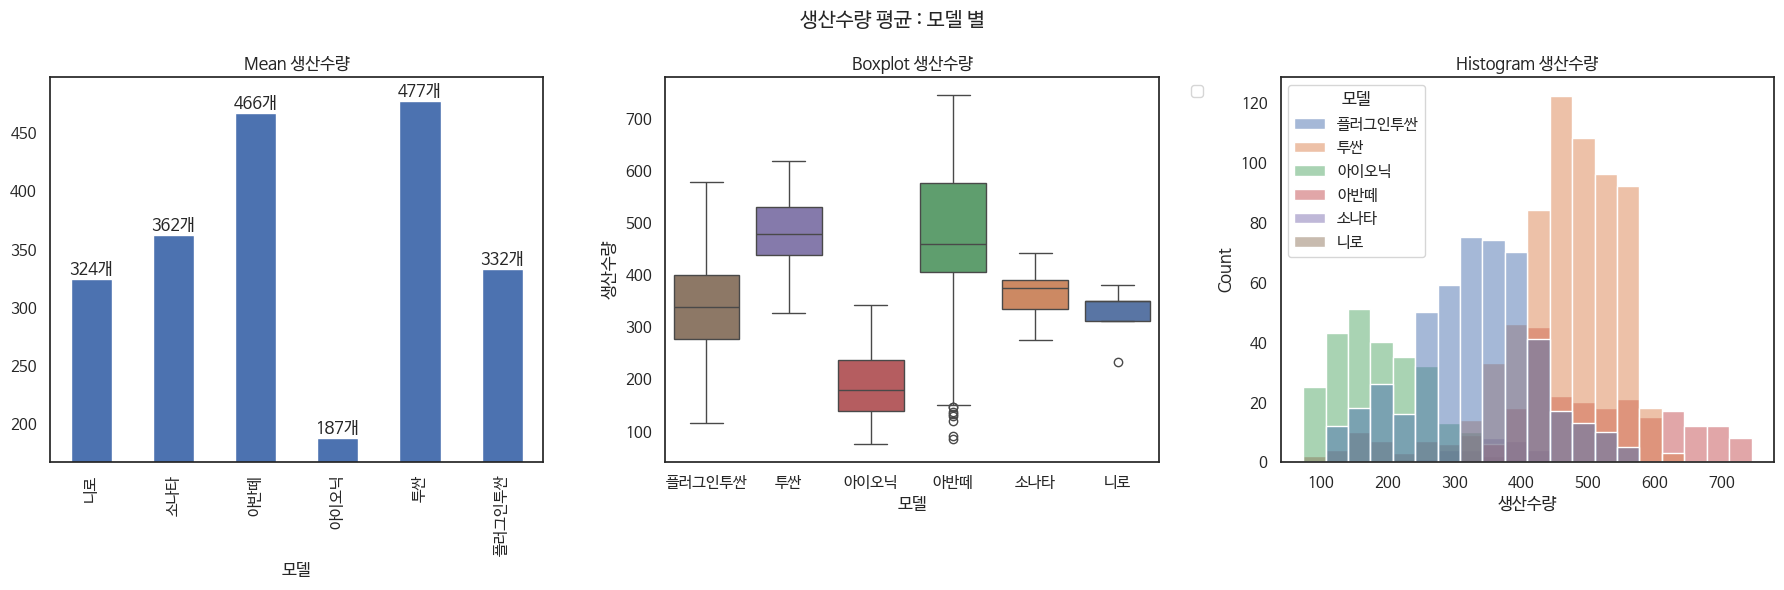

In [34]:
target_col = 'ÏÉùÏÇ∞ÏàòÎüâ'
col = 'Î™®Îç∏'

make_plot_1(target_col, col)

# ÏïºÍ∞ÑÏùò ÌèâÍ∑† ÏÉùÏÇ∞ÏàòÎüâÏù¥ Ï£ºÍ∞ÑÏùò ÌèâÍ∑† ÏÉùÏÇ∞ÏàòÎüâÎ≥¥Îã§ 70Í∞ú ÎßéÎã§.

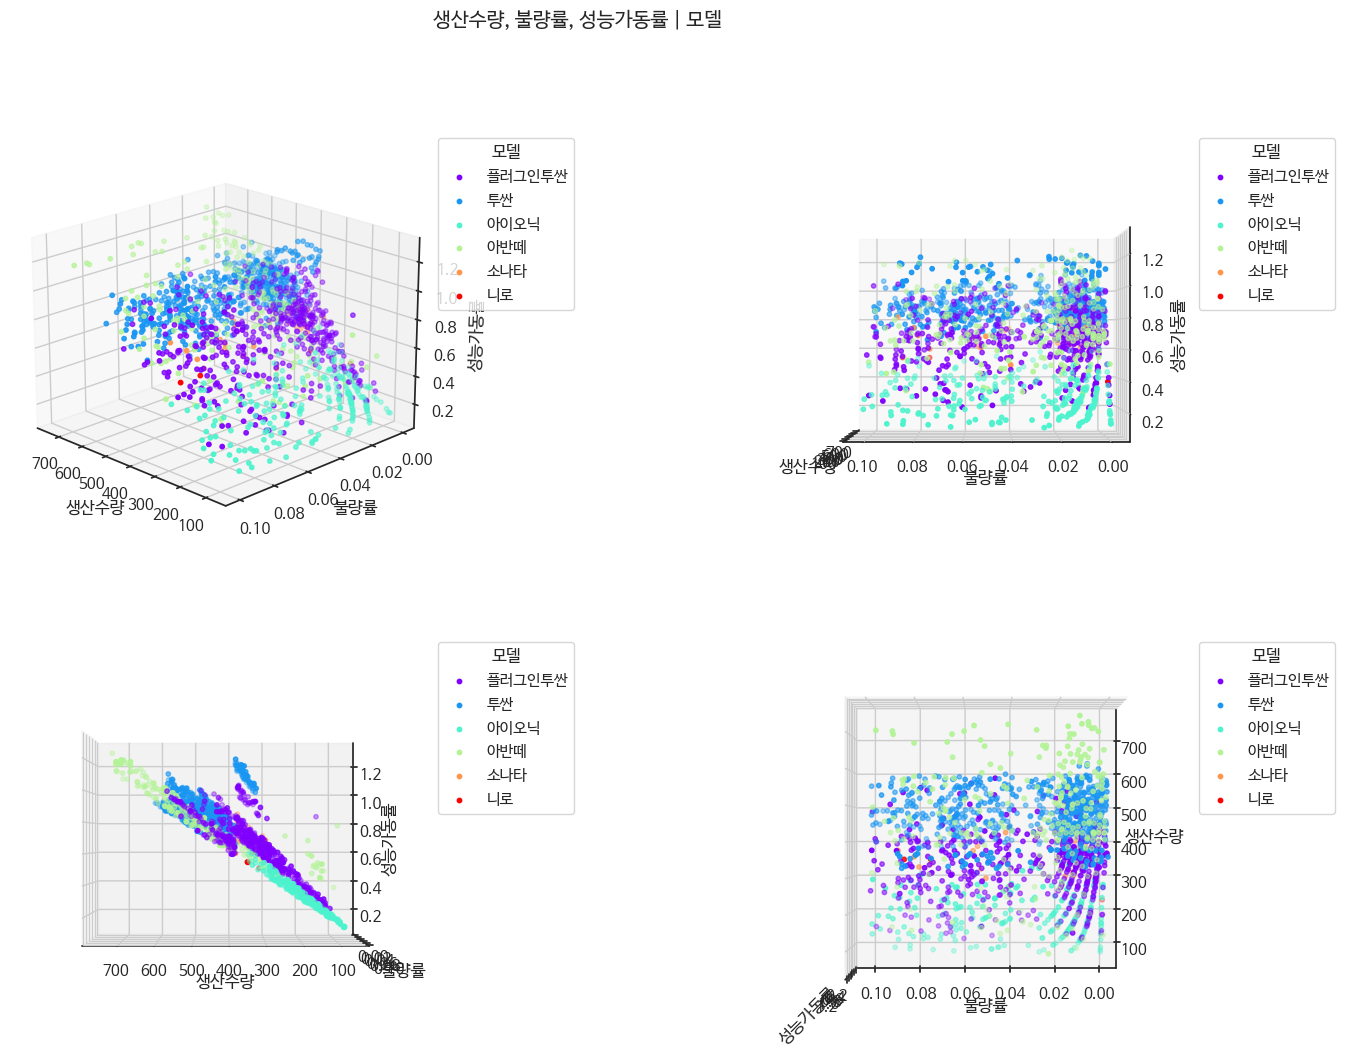

In [35]:
col_x = 'ÏÉùÏÇ∞ÏàòÎüâ'
col_y = 'Î∂àÎüâÎ•†'
col_z = 'ÏÑ±Îä•Í∞ÄÎèôÎ•†'
col_hue = 'Î™®Îç∏'

scatter_3D(data, col_x, col_y, col_z, col_hue, 20, 135, 10)

# ÏïÑÏù¥Ïò§Îãâ, ÌîåÎü¨Í∑∏Ïù∏Ìà¨Ïãº : Î∂àÎüâÎ•†Ïù¥ 0.03 Ïù¥Ìïò, ÏÑ±Îä• Í∞ÄÎèôÎ•†Ïù¥ 0.6 Ïù¥ÌïòÏù∏ Í≤ΩÏö∞ ÏÑ±Îä•Í∞ÄÎèôÎ•†Ïù¥ ÎÇÆÏïÑÏßàÏàòÎ°ù Î∂àÎüâÎ•†Ïù¥ ÎÜíÏïÑÏßÄÎäî Ï∂îÏÑ∏Î•º ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

üëâ Í∞ÄÏÑ§ : ÏïÑÎ∞òÎñºÏùò ÏÉùÏÇ∞ÏàòÎüâÏùò Î∂ÑÏÇ∞Ïù¥ ÌÉÄ Î™®Îç∏Îì§Ïóê ÎπÑÌï¥ ÎÜíÏùÑ Í≤ÉÏù¥Îã§.

##### 2 ÏÉùÏÇ∞ÏàòÎüâ, 4Ïõî 29Ïùº ~ 8Ïõî 1Ïùº, ÏÑ§ÎπÑ(LINE_A)

In [36]:
start_date = pd.to_datetime('2022-04-28')
end_date = pd.to_datetime('2022-08-02')

data_0429_0801 = data.loc[(start_date < data['ÏûëÏóÖÏùºÏûê']) & (data['ÏûëÏóÖÏùºÏûê'] < end_date)]
data_0429_0801_n = data.loc[(start_date >= data['ÏûëÏóÖÏùºÏûê']) | (data['ÏûëÏóÖÏùºÏûê'] >= end_date)]

print(f'{start_date} ~ {end_date} : {len(data_0429_0801)}')
print(f'{start_date} ~ {end_date} Ïô∏ : {len(data_0429_0801_n)}')

2022-04-28 00:00:00 ~ 2022-08-02 00:00:00 : 436
2022-04-28 00:00:00 ~ 2022-08-02 00:00:00 Ïô∏ : 1210


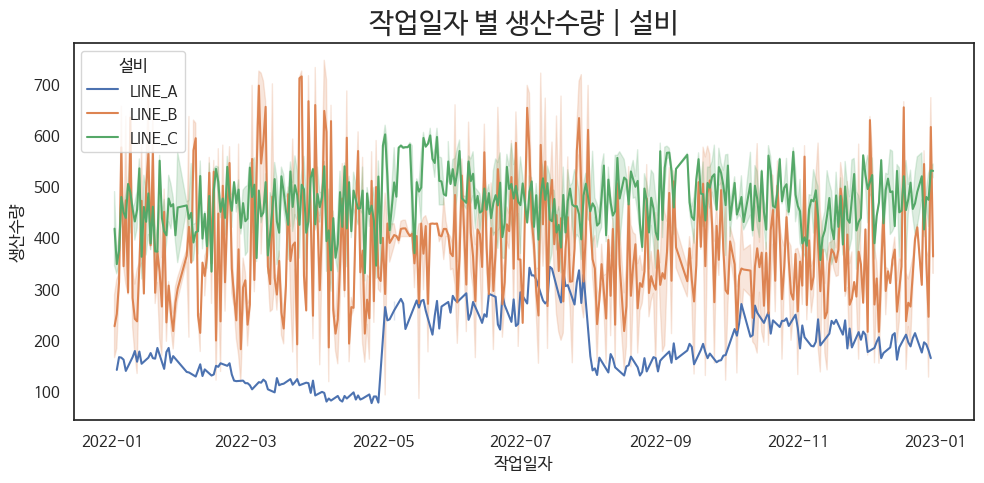

In [37]:
plt.figure(figsize=(10, 5))
sns.lineplot(data, x='ÏûëÏóÖÏùºÏûê', y='ÏÉùÏÇ∞ÏàòÎüâ', hue='ÏÑ§ÎπÑ', hue_order=data['ÏÑ§ÎπÑ'].sort_values().unique())

plt.title('ÏûëÏóÖÏùºÏûê Î≥Ñ ÏÉùÏÇ∞ÏàòÎüâ | ÏÑ§ÎπÑ', y=1.01, fontsize=20)
plt.tight_layout()
plt.show()

# 22.04.29 ~ 22.08.01 ÏÇ¨Ïù¥Ïóê LINE_AÏóêÏÑúÏùò ÏÉùÏÇ∞ÎüâÏù¥ ÌÅ¨Í≤å Ïò¨ÎûêÎã§.

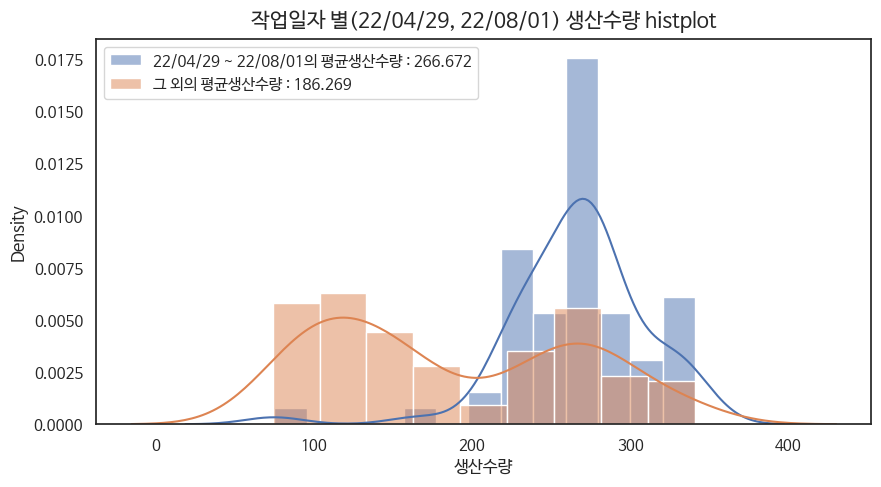

In [38]:
col_num = 'ÏÉùÏÇ∞ÏàòÎüâ'

data_0429_0801 = data[(data['ÏûëÏóÖÏùºÏûê'] > start_date ) & (end_date > data['ÏûëÏóÖÏùºÏûê']) & (data['ÏÑ§ÎπÑ']=='LINE_A')]
data_0429_0801_n = data[((data['ÏûëÏóÖÏùºÏûê'] <= start_date ) | (end_date > data['ÏûëÏóÖÏùºÏûê'])) & (data['ÏÑ§ÎπÑ']=='LINE_A')]

unique_category = ['22/04/29 ~ 22/08/01', 'Í∑∏ Ïô∏']
h_samples = [data_0429_0801, data_0429_0801_n]

plt.figure(figsize=(10, 5))
for idx, cate in enumerate(unique_category):

    h_sample = h_samples[idx][col_num]
    ax = sns.histplot(h_sample, kde=True, stat="density", kde_kws=dict(cut=3),
                      label=f"{cate}Ïùò ÌèâÍ∑†{col_num} : {np.round(h_sample.mean(), 3)}")

plt.title('ÏûëÏóÖÏùºÏûê Î≥Ñ(22/04/29, 22/08/01) ÏÉùÏÇ∞ÏàòÎüâ histplot', y=1.01, fontsize=15)
plt.legend()
plt.show()

üëâ Í∞ÄÏÑ§ : LINE_AÏóêÏÑú 22ÎÖÑ 4Ïõî 29Ïùº~22ÎÖÑ 8Ïõî 1Ïùº ÏÇ¨Ïù¥Ïóê ÌèâÍ∑† ÏÉùÏÇ∞ÏàòÎüâÏù¥ Îã§Î•∏ ÎÇ†Ïóê ÎπÑÌï¥ ÎÜíÏùÑ Í≤ÉÏù¥Îã§.

#### (2) Î∂àÎüâÎ•†


##### 1 Î∂àÎüâÎ•†, Í∑ºÏÜçÎÖÑÏàò

Î∂àÎüâÏàòÎüâ / ÏÉùÏÇ∞ÏàòÎüâ

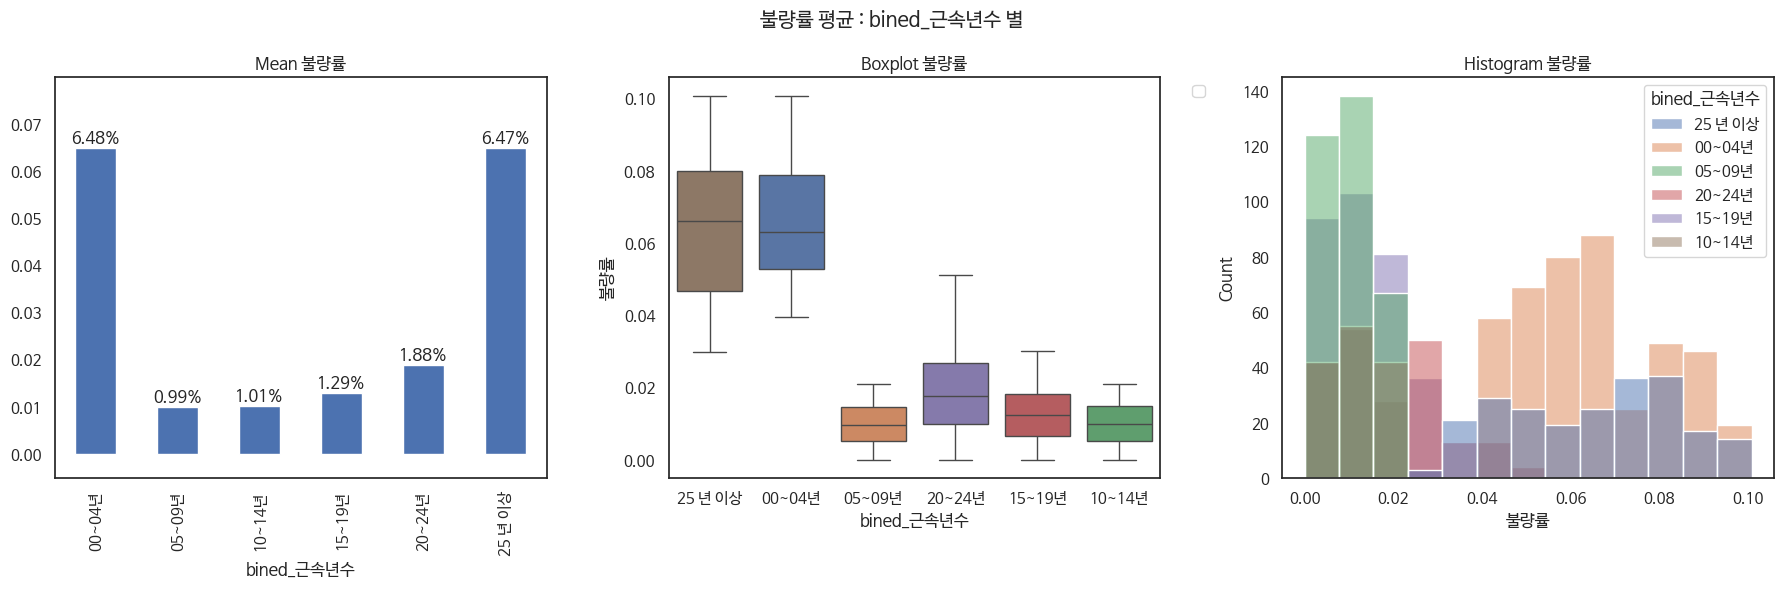

In [39]:
target_col = 'Î∂àÎüâÎ•†'
col = 'bined_Í∑ºÏÜçÎÖÑÏàò'

make_plot_1(target_col, col)

# Í∑ºÏÜçÎÖÑÏàòÍ∞Ä 00-04ÎÖÑ, 25ÎÖÑ Ïù¥ÏÉÅÏù∏ Í≤ΩÏö∞ Î∂àÎüâÎ•†Ïù¥ Îß§Ïö∞ ÎÜíÎã§.

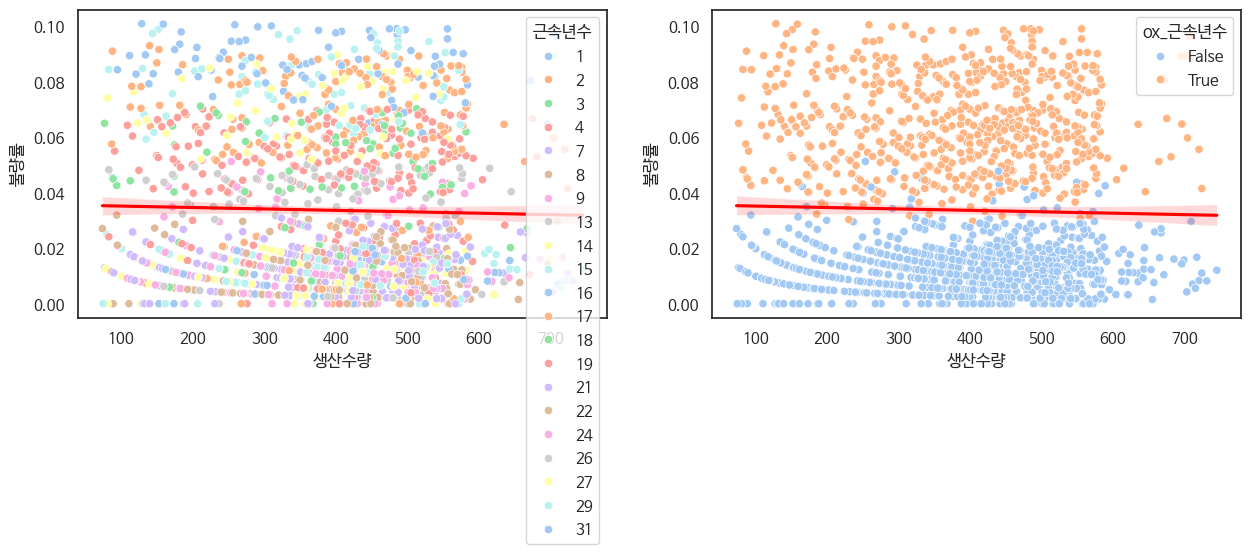

In [40]:
data['ox_Í∑ºÏÜçÎÖÑÏàò'] = (data['bined_Í∑ºÏÜçÎÖÑÏàò'] == '00~04ÎÖÑ') | (data['bined_Í∑ºÏÜçÎÖÑÏàò'] == '25 ÎÖÑ Ïù¥ÏÉÅ')

fig, ax = plt.subplots(1, 2, figsize=(15, 4))
sns.scatterplot(data=data, x='ÏÉùÏÇ∞ÏàòÎüâ', y='Î∂àÎüâÎ•†', hue='Í∑ºÏÜçÎÖÑÏàò', ax=ax[0], palette='pastel')
sns.regplot(data=data, x='ÏÉùÏÇ∞ÏàòÎüâ', y='Î∂àÎüâÎ•†', scatter=False, color='red', ax=ax[0])

sns.scatterplot(data=data, x='ÏÉùÏÇ∞ÏàòÎüâ', y='Î∂àÎüâÎ•†', hue='ox_Í∑ºÏÜçÎÖÑÏàò', ax=ax[1], palette='pastel')
sns.regplot(data=data, x='ÏÉùÏÇ∞ÏàòÎüâ', y='Î∂àÎüâÎ•†', scatter=False, color='red', ax=ax[1])

plt.show()

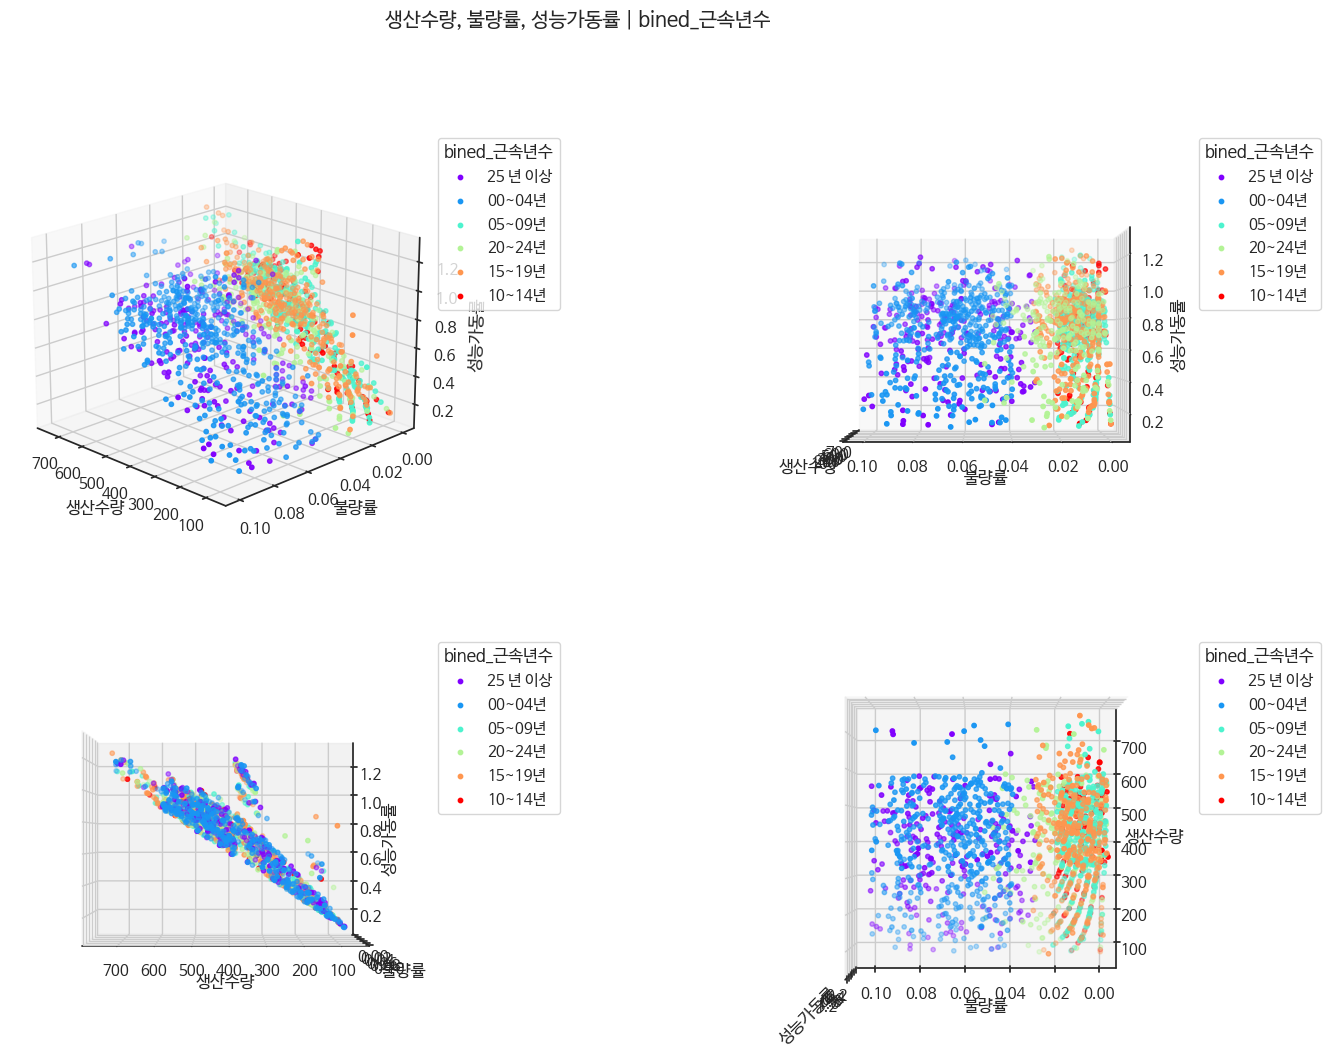

In [41]:
col_x = 'ÏÉùÏÇ∞ÏàòÎüâ'
col_y = 'Î∂àÎüâÎ•†'
col_z = 'ÏÑ±Îä•Í∞ÄÎèôÎ•†'
col_hue = 'bined_Í∑ºÏÜçÎÖÑÏàò'

scatter_3D(data, col_x, col_y, col_z, col_hue, 20, 135, 10)

# 00~04ÎÖÑ, 25ÎÖÑÏù¥ÏÉÅÏù∏ Í≤ΩÏö∞ Î∂àÎüâÎ•†Ïù¥ ÎÜíÍ≤å Î∂ÑÌè¨Ìï¥ ÏûàÎã§.
# 05~09ÎÖÑ 10~14ÎÖÑ 15~19ÎÖÑÏù∏ Í≤ΩÏö∞ Î∂àÎüâÎ•†Ïù¥ ÎÇÆÍ≤å Î∂ÑÌè¨Ìï¥ ÏûàÎã§.
# 20~24ÎÖÑ : Î∂àÎüâÎ•†Ïù¥ Í≥®Í≥†Î£® Î∂ÑÌè¨Ìï¥ ÏûàÎã§.
# üëâ ÎÇòÏù¥Î≥¥Îã§ Îçî ÎöúÎ†∑ÌïòÍ≤å Íµ¨Î∂ÑÌï† Ïàò ÏûàÏùå

# Î∂àÎüâÎ•† 0.03Ïù¥ÌïòÏóêÏÑú 3Ï§ÑÏùò ÏÉÅÍ¥ÄÏÑ±ÏùÄ Ï£ºÎ°ú 30~39ÏÇ¥ ÏÇ¨Ïù¥ÏóêÏÑú ÎÇòÌÉÄÎÇ¨Îã§.

üëâ Í∞ÄÏÑ§ : Í∑ºÏÜçÎÖÑÏàòÍ∞Ä 00-04ÎÖÑ, 25ÎÖÑ Ïù¥ÏÉÅÏù∏ Í≤ΩÏö∞ ÌèâÍ∑† Î∂àÎüâÎ•†Ïù¥ Îã§Î•∏ ÎÖÑÏàòÏóê ÎπÑÌï¥ ÎÜíÏùÑ Í≤ÉÏù¥Îã§.

#### (3) ÏãúÍ∞ÑÍ∞ÄÎèôÎ•†

##### 1 ÏãúÍ∞ÑÍ∞ÄÎèôÎ•†, ÏÑ§ÎπÑ(LINE_C)  


 ÏãúÍ∞ÑÍ∞ÄÎèôÎ•† = $\frac{Í∞ÄÎèôÏãúÍ∞Ñ}{Î∂ÄÌïòÏãúÍ∞Ñ}$

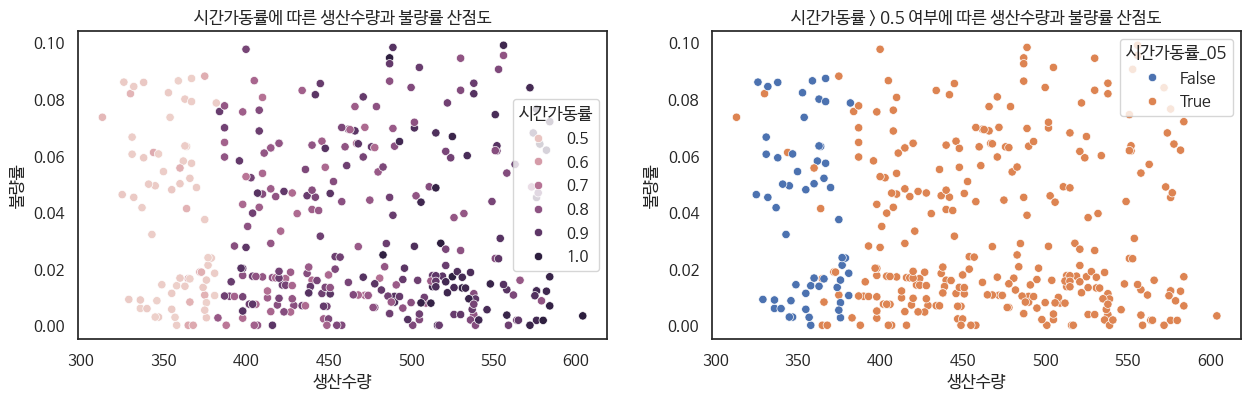

In [42]:
data['ÏãúÍ∞ÑÍ∞ÄÎèôÎ•†_05'] = data['ÏãúÍ∞ÑÍ∞ÄÎèôÎ•†'] > 0.5

fig, ax = plt.subplots(1, 2, figsize=(15, 4))

sns.scatterplot(data=data[(data['ÏÑ§ÎπÑ']=='LINE_C') & (data['Í∑ºÎ¨¥Ï°∞']=='Ï£ºÍ∞Ñ')], x='ÏÉùÏÇ∞ÏàòÎüâ', y='Î∂àÎüâÎ•†', hue='ÏãúÍ∞ÑÍ∞ÄÎèôÎ•†', ax=ax[0])
ax[0].set_title('ÏãúÍ∞ÑÍ∞ÄÎèôÎ•†Ïóê Îî∞Î•∏ ÏÉùÏÇ∞ÏàòÎüâÍ≥º Î∂àÎüâÎ•† ÏÇ∞Ï†êÎèÑ')

sns.scatterplot(data=data[(data['ÏÑ§ÎπÑ']=='LINE_C') & (data['Í∑ºÎ¨¥Ï°∞']=='Ï£ºÍ∞Ñ')], x='ÏÉùÏÇ∞ÏàòÎüâ', y='Î∂àÎüâÎ•†', hue='ÏãúÍ∞ÑÍ∞ÄÎèôÎ•†_05', ax=ax[1])
ax[1].set_title('ÏãúÍ∞ÑÍ∞ÄÎèôÎ•† > 0.5 Ïó¨Î∂ÄÏóê Îî∞Î•∏ ÏÉùÏÇ∞ÏàòÎüâÍ≥º Î∂àÎüâÎ•† ÏÇ∞Ï†êÎèÑ')

plt.show()


üëâ Í∞ÄÏÑ§ : LINE_CÏóêÏÑú ÏÉùÏÇ∞ÏàòÎüâÏù¥ 375Í∞ú Ïù¥ÏÉÅÏùºÎïå ÏãúÍ∞ÑÍ∞ÄÎèôÎ•†Ïù¥ ÎÜíÏùÑ Í≤ÉÏù¥Îã§.

ÏÉùÏÇ∞ÏàòÎüâÏù¥ 375Í∞ú Î≥¥Îã§ ÎÇÆÏùÄ Í≤ΩÏö∞ ÎπÑÌö®Ïú®Ï†ÅÏúºÎ°ú ÏÉùÏÇ∞Ïù¥ Ïù¥Î£®Ïñ¥Ï°åÎã§Í≥† ÏÉùÍ∞ÅÌï¥Î≥º Ïàò ÏûàÏùå

## üëâ  Í∞ÄÏÑ§


| <font size="4">**Í∞ÄÏÑ§ Î≤àÌò∏**</font> | <font size="4">**Í∞ÄÏÑ§ ÏÑ§Î™Ö**</font> | <font size="4">**ÎèÑÌëú**</font> |
| ----------------------------------- | ----------------------- | ----------------------- |
| <font size="4">ÏÉùÏÇ∞ÏàòÎüâ-1</font> |  <font size="4">ÏïÑÎ∞òÎñºÏùò ÏÉùÏÇ∞ÏàòÎüâÏùò Î∂ÑÏÇ∞Ïù¥ ÌÉÄ Î™®Îç∏Îì§Ïóê ÎπÑÌï¥ ÎÜíÏùÑ Í≤ÉÏù¥Îã§.</font> | <font size="4">EDA - ÏÉùÏÇ∞ÏàòÎüâ, Î™®Îç∏</font> |
| <font size="4">ÏÉùÏÇ∞ÏàòÎüâ-2</font> |  <font size="4">LINE_AÏóêÏÑú 22ÎÖÑ 4Ïõî 29Ïùº~22ÎÖÑ 8Ïõî 1Ïùº ÏÇ¨Ïù¥Ïóê ÌèâÍ∑† ÏÉùÏÇ∞ÏàòÎüâÏù¥ Îã§Î•∏ ÎÇ†Ïóê ÎπÑÌï¥ ÎÜíÏùÑ Í≤ÉÏù¥Îã§.</font> | <font size="4">EDA - ÏÉùÏÇ∞ÏàòÎüâ, 4Ïõî 29Ïùº ~ 8Ïõî 1Ïùº, ÏÑ§ÎπÑ(LINE_A)</font> |
| <font size="4">Î∂àÎüâÎ•†-1</font> |<font size="4">Í∑ºÏÜçÎÖÑÏàòÍ∞Ä 00-04ÎÖÑ, 25ÎÖÑ Ïù¥ÏÉÅÏù∏ Í≤ΩÏö∞ ÌèâÍ∑† Î∂àÎüâÎ•†Ïù¥ Îã§Î•∏ ÎÖÑÏàòÏóê ÎπÑÌï¥ ÎÜíÏùÑ Í≤ÉÏù¥Îã§.</font> | <font size="4">EDA - Î∂àÎüâÎ•†, Í∑ºÏÜçÎÖÑÏàò</font> |
| <font size="4">ÏãúÍ∞ÑÍ∞ÄÎèôÎ•†-1</font> | <font size="4">LINE_CÏóêÏÑú ÏÉùÏÇ∞ÏàòÎüâÏù¥ 375Í∞ú Ïù¥ÏÉÅÏùºÎïå ÏãúÍ∞ÑÍ∞ÄÎèôÎ•†Ïù¥ ÎÜíÏùÑ Í≤ÉÏù¥Îã§.</font> | <font size="4">EDA - ÏãúÍ∞ÑÍ∞ÄÎèôÎ•†, ÏÑ§ÎπÑ(LINE_C)</font> |


# 4. Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù


## Î∂ÑÏÑùÍ≥ÑÌöç


| Í∞ÄÏÑ§ Î≤àÌò∏ | Í∞ÄÏÑ§ | Í≤ÄÏ†ïÎ∞©Î≤ï | Îç∞Ïù¥ÌÑ∞ Type |
|-----------|-----|---------|------|
| <font size="4">ÏÉùÏÇ∞ÏàòÎüâ-1</font> | <font size="4">ÏïÑÎ∞òÎñºÏùò ÏÉùÏÇ∞ÏàòÎüâÏùò Î∂ÑÏÇ∞Ïù¥ ÌÉÄ Î™®Îç∏Îì§Ïóê ÎπÑÌï¥ ÎÜíÏùÑ Í≤ÉÏù¥Îã§.</font> | <font size="4">Î•¥ÎπàÏùò Îì±Î∂ÑÏÇ∞ Í≤ÄÏ†ï</font> | <font size="4">Î™ÖÎ™©Ìòï / Ïó∞ÏÜçÌòï</font> |
| <font size="4">ÏÉùÏÇ∞ÏàòÎüâ-2</font> | <font size="4">LINE_AÏóêÏÑú 22ÎÖÑ 4Ïõî 29Ïùº~22ÎÖÑ 8Ïõî 1Ïùº ÏÇ¨Ïù¥Ïóê ÌèâÍ∑† ÏÉùÏÇ∞ÏàòÎüâÏù¥ Îã§Î•∏ ÎÇ†Ïóê ÎπÑÌï¥ ÎÜíÏùÑ Í≤ÉÏù¥Îã§.</font> | <font size="4">ÎèÖÎ¶ΩÌëúÎ≥∏ t Í≤ÄÏ†ï(Îã®Ï∏°)</font> | <font size="4">Î™ÖÎ™©Ìòï / Ïó∞ÏÜçÌòï</font> |
| <font size="4">Î∂àÎüâÎ•†-1</font> | <font size="4">Í∑ºÏÜçÎÖÑÏàòÍ∞Ä 00-04ÎÖÑ, 25ÎÖÑ Ïù¥ÏÉÅÏù∏ Í≤ΩÏö∞ ÌèâÍ∑† Î∂àÎüâÎ•†Ïù¥ Îã§Î•∏ ÎÖÑÏàòÏóê ÎπÑÌï¥ ÎÜíÏùÑ Í≤ÉÏù¥Îã§.</font> | <font size="4">ÎèÖÎ¶ΩÌëúÎ≥∏ t Í≤ÄÏ†ï(Îã®Ï∏°), Î∂ÑÏÇ∞Î∂ÑÏÑù(ANOVA)</font> | <font size="4">Î™ÖÎ™©Ìòï / Ïó∞ÏÜçÌòï</font> |
| <font size="4">ÏãúÍ∞ÑÍ∞ÄÎèôÎ•†-1</font> | <font size="4">LINE_CÏóêÏÑú ÏÉùÏÇ∞ÏàòÎüâÏù¥ 375Í∞ú Ïù¥ÏÉÅÏùºÎïå ÏãúÍ∞ÑÍ∞ÄÎèôÎ•†Ïù¥ ÎÜíÏùÑ Í≤ÉÏù¥Îã§.</font> | <font size="4">ÎèÖÎ¶ΩÌëúÎ≥∏ t Í≤ÄÏ†ï(Îã®Ï∏°)</font> | <font size="4">Î™ÖÎ™©Ìòï / Ïó∞ÏÜçÌòï</font> |


In [43]:
from scipy.stats import levene

def one_way_Equal_Variance_test(col_cat, col_num, h0_name):

    unique_category = natsorted(data[col_cat].unique().tolist())

    unique_category.remove(h0_name)
    h_data = [data.loc[data[col_cat]==cate, col_num] for cate in unique_category]

    alpha = 0.05
    print(f'üìç Îã®Ï∏° Îì±Î∂ÑÏÇ∞Í≤ÄÏ†ï')
    #print(f'üìç Ïã†Î¢∞ÏàòÏ§Ä : {(1-alpha)*100}%')
    print(f'üìç Ïú†ÏùòÏàòÏ§Ä : {alpha}')
    print(f'unique_category : {unique_category}')

    for idx, cate in enumerate(unique_category):
        print(f'\n\n<< {h0_name} / {cate} >>')
        statistic, p_value = levene(data.loc[data[col_cat]==h0_name, col_num], h_data[idx], center='median')
        #print(f"test statistic: {statistic}")
        print(f"P-value: {np.round(p_value, 9)}")

        if p_value < alpha:
            print('üëâ  ÎåÄÎ¶ΩÍ∞ÄÏÑ§ Ï±ÑÌÉù')
            print(f"üëâ  {h0_name}Ïùò {col_num} Î∂ÑÏÇ∞Ïù¥ {cate}Ïùò Î∂ÑÏÇ∞Î≥¥Îã§ ÌÅ¨Îã§.")
        else:
            print('üëâ  Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù')
            print(f"üëâ  {h0_name}Ïùò {col_num} Î∂ÑÏÇ∞Ïù¥ {cate}Ïùò Î∂ÑÏÇ∞Í≥º Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏóÜÎã§.")

In [44]:
import scipy as sp

def one_way_independent_t_test(col_cat, col_num, h0_names):

    alpha = 0.05
    print(f'üìç Îã®Ï∏° ÎèÖÎ¶Ω t Í≤ÄÏ†ï')
    print(f'üìç Ïú†ÏùòÏàòÏ§Ä : {alpha}')

    if len(h0_names) > 1:

        for h0_name in h0_names:
            unique_category = natsorted(data[col_cat].unique().tolist())
            print(f'\n\n‚úÖ {h0_name}')

            # ÌôïÏù∏ÌïòÍ≥†Ïûê ÌïòÎäî ÎåÄÏÉÅ drop
            for h0_name_re in h0_names:
                unique_category.remove(h0_name_re)

            print(f'unique_category : {unique_category}')

            h_data = [data.loc[data[col_cat]==cate, col_num] for cate in unique_category]
            for idx, cate in enumerate(unique_category):
                print(f'\n<< {h0_name} / {cate} >>')
                statistic, p_value = sp.stats.ttest_ind(data.loc[data[col_cat]==h0_name, col_num], h_data[idx], equal_var=False)
                #print(f"test statistic: {statistic}")
                print(f"P-value: {np.round(p_value, 5)}")

                if p_value < alpha:
                    print('üëâ  ÎåÄÎ¶ΩÍ∞ÄÏÑ§ Ï±ÑÌÉù')
                    print(f"üëâ  {h0_name}Ïùò {col_num} ÌèâÍ∑†Ïù¥ {cate}Ïùò ÌèâÍ∑†Î≥¥Îã§ ÌÅ¨Îã§.")
                else:
                    print('üëâ  Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù')
                    print(f"üëâ  {h0_name}Ïùò {col_num} ÌèâÍ∑†Ïù¥ {cate}Ïùò ÌèâÍ∑†Í≥º Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏóÜÎã§.")

    else:

        unique_category = natsorted(data[col_cat].unique().tolist())
        print(f'unique_category : {unique_category}')

        unique_category.remove(h0_names[0])
        h_data = [data.loc[data[col_cat]==cate, col_num] for cate in unique_category]

        for idx, cate in enumerate(unique_category):
            print(f'\n\n<< {h0_names[0]} / {cate} >>')
            statistic, p_value = sp.stats.ttest_ind(data.loc[data[col_cat]==h0_names[0], col_num], h_data[idx], equal_var=False)
            print(f"P-value: {np.round(p_value, 9)}")

            if p_value < alpha:
                print('üëâ  ÎåÄÎ¶ΩÍ∞ÄÏÑ§ Ï±ÑÌÉù')
                print(f"üëâ  {h0_names[0]}Ïùò {col_num} ÌèâÍ∑†Ïù¥ {cate}Ïùò ÌèâÍ∑†Î≥¥Îã§ ÌÅ¨Îã§.")
            else:
                print('üëâ  Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù')
                print(f"üëâ  {h0_names[0]}Ïùò {col_num} ÌèâÍ∑†Ïù¥ {cate}Ïùò ÌèâÍ∑†Í≥º Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏóÜÎã§.")

In [45]:
from scipy.stats import f_oneway

def one_way_ANOVA(target_col, col):

    print('üìç Î∂ÑÏÇ∞Î∂ÑÏÑù(ANOVA)')
    print('üìç Í∏∞Í∞ÅÏó≠ : 0.05')

    # ÏÑ§ÎπÑÏóê Îî∞Î•∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
    education_levels = data[col].unique().tolist()
    education_dfs = {level: data[data[col] == level] for level in education_levels}


    # Í∞Å ÌïôÎ†•Î≥Ñ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê ÎåÄÌï¥ Î∂àÎüâÏàòÎüâÏùò Ï∞®Ïù¥Ïóê ÎåÄÌïú Î∂ÑÏÇ∞Î∂ÑÏÑù(ANOVA) ÏàòÌñâ
    anova_result = f_oneway(*[df[target_col] for df in education_dfs.values()])

    # Í≤∞Í≥º Ï∂úÎ†•
    print("\n‚úÖ ANOVA Í≤∞Í≥º:")
    print(f"F-statistic: {anova_result.statistic:.4f}")
    print(f"P-value: {anova_result.pvalue:.4f}\n")

    # Ïú†ÏùòÏàòÏ§Ä ÏÑ§Ï†ï
    alpha = 0.05

    # p-valueÍ∞Ä Ïú†ÏùòÏàòÏ§ÄÎ≥¥Îã§ ÏûëÏúºÎ©¥ Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å, ÎåÄÎ¶ΩÍ∞ÄÏÑ§ Ï±ÑÌÉù
    if anova_result.pvalue < alpha:
        print(f'üëâ ÎåÄÎ¶ΩÍ∞ÄÏÑ§ Ï±ÑÌÉù')
        print(f"{col}Î≥Ñ {target_col}Ïùò ÌèâÍ∑†ÏóêÎäî Ï∞®Ïù¥Í∞Ä ÏûàÎã§.")
    else:
        print(f'\nüëâ Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù')
        print(f"{col}Î≥Ñ {target_col}Ïùò ÌèâÍ∑†ÏóêÎäî Ï∞®Ïù¥Í∞Ä ÏóÜÎã§.")

In [46]:
from scipy.stats import levene

def levene_test(target_col, col):

    print('üìç Î†àÎπàÏùò Îì±Î∂ÑÏÇ∞ Í≤ÄÏ†ï')
    print('üìç Í∏∞Í∞ÅÏó≠ : 0.05')

    # ÏÑ§ÎπÑÏóê Îî∞Î•∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
    education_levels = data[col].unique().tolist()
    education_dfs = {level: data[data[col] == level] for level in education_levels}

    # Í∞Å ÌïôÎ†•Î≥Ñ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê ÎåÄÌï¥ Î†àÎπàÏùò Îì±Î∂ÑÏÇ∞ Í≤ÄÏ†ï ÏàòÌñâ
    levene_result = levene(*[df[target_col] for df in education_dfs.values()])

    # Í≤∞Í≥º Ï∂úÎ†•
    print("\n‚úÖ Levene's Test Í≤∞Í≥º:")
    print(f"W-statistic: {levene_result.statistic:.4f}")
    print(f"P-value: {levene_result.pvalue:.4f}\n")

    # Ïú†ÏùòÏàòÏ§Ä ÏÑ§Ï†ï
    alpha = 0.05

    # p-valueÍ∞Ä Ïú†ÏùòÏàòÏ§ÄÎ≥¥Îã§ ÏûëÏúºÎ©¥ Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å, ÎåÄÎ¶ΩÍ∞ÄÏÑ§ Ï±ÑÌÉù
    if levene_result.pvalue < alpha:
        print(f'üëâ ÎåÄÎ¶ΩÍ∞ÄÏÑ§ Ï±ÑÌÉù')
        print(f"{col}Î≥Ñ {target_col}Ïùò Î∂ÑÏÇ∞ÏóêÎäî Ï∞®Ïù¥Í∞Ä ÏûàÎã§.")
    else:
        print(f'\nüëâ Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù')
        print(f"{col}Î≥Ñ {target_col}Ïùò Î∂ÑÏÇ∞ÏóêÎäî Ï∞®Ïù¥Í∞Ä ÏóÜÎã§.")


### Í∞ÄÏÑ§ : ÏÉùÏÇ∞ÏàòÎüâ-1
**ÏïÑÎ∞òÎñºÏùò ÏÉùÏÇ∞ÏàòÎüâÏùò Î∂ÑÏÇ∞Ïù¥ ÌÉÄ Î™®Îç∏Îì§Ïóê ÎπÑÌï¥ ÎÜíÏùÑ Í≤ÉÏù¥Îã§.**  
  
**üëâ leveneÏùò Îì±Î∂ÑÏÇ∞Í≤ÄÏ†ï : Î™®Îç∏ 2Í∞úÏî© ÎπÑÍµê**

$H_0$ : $s_{ÏÉùÏÇ∞ÏàòÎüâ, ÏïÑÎ∞òÎñº}^2 = s_{ÏÉùÏÇ∞ÏàòÎüâ, model}^2$  for some $models$
  

$H_1$ : $s_{ÏÉùÏÇ∞ÏàòÎüâ, ÏïÑÎ∞òÎñº}^2 > s_{ÏÉùÏÇ∞ÏàòÎüâ, model}^2$ for some $models$

In [47]:
# Îì±Î∂ÑÏÇ∞ Í≤ÄÏ†ï
col_cat = 'Î™®Îç∏'
col_num = 'ÏÉùÏÇ∞ÏàòÎüâ'
h0_name = 'ÏïÑÎ∞òÎñº'

one_way_Equal_Variance_test(col_cat, col_num, h0_name)

üìç Îã®Ï∏° Îì±Î∂ÑÏÇ∞Í≤ÄÏ†ï
üìç Ïú†ÏùòÏàòÏ§Ä : 0.05
unique_category : ['ÎãàÎ°ú', 'ÏÜåÎÇòÌÉÄ', 'ÏïÑÏù¥Ïò§Îãâ', 'Ìà¨Ïãº', 'ÌîåÎü¨Í∑∏Ïù∏Ìà¨Ïãº']


<< ÏïÑÎ∞òÎñº / ÎãàÎ°ú >>
P-value: 0.05424536
üëâ  Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù
üëâ  ÏïÑÎ∞òÎñºÏùò ÏÉùÏÇ∞ÏàòÎüâ Î∂ÑÏÇ∞Ïù¥ ÎãàÎ°úÏùò Î∂ÑÏÇ∞Í≥º Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏóÜÎã§.


<< ÏïÑÎ∞òÎñº / ÏÜåÎÇòÌÉÄ >>
P-value: 3.786e-06
üëâ  ÎåÄÎ¶ΩÍ∞ÄÏÑ§ Ï±ÑÌÉù
üëâ  ÏïÑÎ∞òÎñºÏùò ÏÉùÏÇ∞ÏàòÎüâ Î∂ÑÏÇ∞Ïù¥ ÏÜåÎÇòÌÉÄÏùò Î∂ÑÏÇ∞Î≥¥Îã§ ÌÅ¨Îã§.


<< ÏïÑÎ∞òÎñº / ÏïÑÏù¥Ïò§Îãâ >>
P-value: 0.0
üëâ  ÎåÄÎ¶ΩÍ∞ÄÏÑ§ Ï±ÑÌÉù
üëâ  ÏïÑÎ∞òÎñºÏùò ÏÉùÏÇ∞ÏàòÎüâ Î∂ÑÏÇ∞Ïù¥ ÏïÑÏù¥Ïò§ÎãâÏùò Î∂ÑÏÇ∞Î≥¥Îã§ ÌÅ¨Îã§.


<< ÏïÑÎ∞òÎñº / Ìà¨Ïãº >>
P-value: 0.0
üëâ  ÎåÄÎ¶ΩÍ∞ÄÏÑ§ Ï±ÑÌÉù
üëâ  ÏïÑÎ∞òÎñºÏùò ÏÉùÏÇ∞ÏàòÎüâ Î∂ÑÏÇ∞Ïù¥ Ìà¨ÏãºÏùò Î∂ÑÏÇ∞Î≥¥Îã§ ÌÅ¨Îã§.


<< ÏïÑÎ∞òÎñº / ÌîåÎü¨Í∑∏Ïù∏Ìà¨Ïãº >>
P-value: 0.0
üëâ  ÎåÄÎ¶ΩÍ∞ÄÏÑ§ Ï±ÑÌÉù
üëâ  ÏïÑÎ∞òÎñºÏùò ÏÉùÏÇ∞ÏàòÎüâ Î∂ÑÏÇ∞Ïù¥ ÌîåÎü¨Í∑∏Ïù∏Ìà¨ÏãºÏùò Î∂ÑÏÇ∞Î≥¥Îã§ ÌÅ¨Îã§.


**üëâ leveneÏùò Îì±Î∂ÑÏÇ∞Í≤ÄÏ†ï : Î™®Îì† Î™®Îç∏ ÎπÑÍµê**

$H_0$ : $s_{ÏÉùÏÇ∞ÏàòÎüâ, ÏïÑÎ∞òÎñº}^2 = s_{ÏÉùÏÇ∞ÏàòÎüâ, model}^2$  for some $models$
  

$H_1$ : $s_{ÏÉùÏÇ∞ÏàòÎüâ, ÏïÑÎ∞òÎñº}^2 \neq s_{ÏÉùÏÇ∞ÏàòÎüâ, model}^2$ for some $models$

In [48]:
target_col = 'ÏÉùÏÇ∞ÏàòÎüâ'
col = 'Î™®Îç∏'

levene_test(target_col, col)

üìç Î†àÎπàÏùò Îì±Î∂ÑÏÇ∞ Í≤ÄÏ†ï
üìç Í∏∞Í∞ÅÏó≠ : 0.05

‚úÖ Levene's Test Í≤∞Í≥º:
W-statistic: 58.7177
P-value: 0.0000

üëâ ÎåÄÎ¶ΩÍ∞ÄÏÑ§ Ï±ÑÌÉù
Î™®Îç∏Î≥Ñ ÏÉùÏÇ∞ÏàòÎüâÏùò Î∂ÑÏÇ∞ÏóêÎäî Ï∞®Ïù¥Í∞Ä ÏûàÎã§.


‚úÖ Í≤∞Î°† : ÎåÄÎ¶ΩÍ∞ÄÏÑ§ ÏùºÎ∂Ä Ï±ÑÌÉù
* ÏïÑÎ∞òÎñºÏùò ÏÉùÏÇ∞ÏàòÎüâ Î∂ÑÏÇ∞Ïù¥ ÎãàÎ°úÎ•º Ï†úÏô∏Ìïú Îã§Î•∏ Î™®Îç∏Îì§Ïùò Î∂ÑÏÇ∞Î≥¥Îã§ ÌÅ¨Îã§.
* Ï†ÑÏ≤¥Î•º Ìïú Î≤àÏóê Í≤ÄÏ†ïÌñàÏùÑ ÎïåÎäî Î™®Îç∏Î≥Ñ Î∂ÑÏÇ∞Ïóê Ï∞®Ïù¥Í∞Ä ÏûàÎã§Îäî Í≤∞Í≥º

### Í∞ÄÏÑ§ : ÏÉùÏÇ∞ÏàòÎüâ-2
**LINE_AÏóêÏÑú 22ÎÖÑ 4Ïõî 29Ïùº~22ÎÖÑ 8Ïõî 1Ïùº ÏÇ¨Ïù¥Ïóê ÌèâÍ∑† ÏÉùÏÇ∞ÏàòÎüâÏù¥ Îã§Î•∏ ÎÇ†Ïóê ÎπÑÌï¥ ÎÜíÏùÑ Í≤ÉÏù¥Îã§.**  
**üëâ ÎèÖÎ¶ΩÌëúÎ≥∏ t Í≤ÄÏ†ï (Îã®Ï∏°)**

$H_0$ : $\mu_{ÏÉùÏÇ∞ÏàòÎüâ, 22.04.29 ~ 22.08.01} = \mu_{ÏÉùÏÇ∞ÏàòÎüâ, Í∑∏\ Ïô∏\ ÏùºÏûê}$

$H_1$ : $\mu_{ÏÉùÏÇ∞ÏàòÎüâ, 22.04.29 ~ 22.08.01} > \mu_{ÏÉùÏÇ∞ÏàòÎüâ, Í∑∏\ Ïô∏\ ÏùºÏûê}$

In [49]:
col_num = 'ÏÉùÏÇ∞ÏàòÎüâ'

start_date = pd.to_datetime('2022-04-29')
end_date = pd.to_datetime('2022-08-01')

data_0429_0801 = data.loc[(data['ÏûëÏóÖÏùºÏûê'] > start_date) & (data['ÏûëÏóÖÏùºÏûê'] < end_date) & (data['ÏÑ§ÎπÑ']=='LINE_A')]
data_0429_0801_n = data.loc[(data['ÏûëÏóÖÏùºÏûê'] <= start_date ) | (data['ÏûëÏóÖÏùºÏûê'] >= end_date) & (data['ÏÑ§ÎπÑ']=='LINE_A')]

unique_category = ['22/04/29~22/08/01', 'Îã§Î•∏ ÎÇ†']
h_samples = [data_0429_0801, data_0429_0801_n]

print('üìç Îã®Ï∏° ÎèÖÎ¶Ω t Í≤ÄÏ†ï')
print('üìç Í∏∞Í∞ÅÏó≠ : 0.05')

print(f'\nunique_category : {unique_category}')

print(f'\n\n<< {unique_category[0]} / {unique_category[1]} >>')
statistic, p_value = sp.stats.ttest_ind(h_samples[0][col_num], h_samples[1][col_num], equal_var=False)
print(f"P-value: {np.round(p_value, 9)}")

if p_value < 0.05:
    print('üëâ  ÎåÄÎ¶ΩÍ∞ÄÏÑ§ Ï±ÑÌÉù')
    print(f"üëâ  {unique_category[0]}Îïå LINE_AÏóêÏÑúÏùò {col_num} ÌèâÍ∑†Ïù¥ {unique_category[1]}Ïùò ÌèâÍ∑†Î≥¥Îã§ ÌÅ¨Îã§.")
else:
    print('üëâ  Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù')
    print(f"üëâ  {unique_category[0]}Îïå LINE_AÏóêÏÑúÏùò {col_num} ÌèâÍ∑†Ïù¥ {unique_category[1]}Ïùò ÌèâÍ∑†Í≥º Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏóÜÎã§.")

üìç Îã®Ï∏° ÎèÖÎ¶Ω t Í≤ÄÏ†ï
üìç Í∏∞Í∞ÅÏó≠ : 0.05

unique_category : ['22/04/29~22/08/01', 'Îã§Î•∏ ÎÇ†']


<< 22/04/29~22/08/01 / Îã§Î•∏ ÎÇ† >>
P-value: 0.0
üëâ  ÎåÄÎ¶ΩÍ∞ÄÏÑ§ Ï±ÑÌÉù
üëâ  22/04/29~22/08/01Îïå LINE_AÏóêÏÑúÏùò ÏÉùÏÇ∞ÏàòÎüâ ÌèâÍ∑†Ïù¥ Îã§Î•∏ ÎÇ†Ïùò ÌèâÍ∑†Î≥¥Îã§ ÌÅ¨Îã§.


‚úÖ Í≤∞Î°† : ÎåÄÎ¶ΩÍ∞ÄÏÑ§ Ï±ÑÌÉù
1. 22/04/29~22/08/01Îïå LINE_AÏóêÏÑúÏùò ÏÉùÏÇ∞ÏàòÎüâ ÌèâÍ∑†Ïù¥ Îã§Î•∏ ÎÇ†Ïùò ÌèâÍ∑†Î≥¥Îã§ ÌÅ¨Îã§.

üìç Ïù¥ÎØ∏ ÏûàÏñ¥ÏßÑ Í≥ºÍ±∞Ïùò ÏùºÏù¥Í∏∞Ïóê 22.04.31 ~ 22.08.01 ÏãúÍ∏∞Ïùò Îç∞Ïù¥ÌÑ∞ Îã§Î•∏ ÎÇ†ÏßúÏôÄ ÎπÑÍµêÌï¥ÏÑú Ï∂îÎ°† Í≤ÄÏ†ïÏùÑ ÏßÑÌñâÌïòÎäî Í≤ÉÏù¥ Î™®ÏßëÎã®Ïùò Î™®ÏàòÎ•º Ï∂îÎ°†ÌïúÎã§Îäî Í¥ÄÏ†êÏóêÏÑú Ïò≥ÏùÄ Í≤ÉÏù∏ÏßÄ ÏùòÎ¨∏Ïù¥ ÏûàÏäµÎãàÎã§.

### Í∞ÄÏÑ§ : Î∂àÎüâÎ•†-1
**Í∑ºÏÜçÎÖÑÏàòÍ∞Ä 00-04ÎÖÑ, 25ÎÖÑ Ïù¥ÏÉÅÏù∏ Í≤ΩÏö∞ ÌèâÍ∑† Î∂àÎüâÎ•†Ïù¥ Îã§Î•∏ ÎÖÑÏàòÏóê ÎπÑÌï¥ ÎÜíÏùÑ Í≤ÉÏù¥Îã§.**

**üëâ ÎèÖÎ¶ΩÌëúÎ≥∏ t Í≤ÄÏ†ï : 2Í∞úÏùò Íµ¨Í∞ÑÌôîÎêú Í∑ºÏÜçÎÖÑÏàòÎ•º ÎπÑÍµê**

  
1. Í∑ºÏÜçÎÖÑÏàò : 00-04ÎÖÑ
$ $  

    $H_0 : \mu_{Î∂àÎüâÎ•†, 00-04ÎÖÑ} = \mu_{Î∂àÎüâÎ•†, bined\_\ Í∑ºÏÜçÎÖÑÏàò}$  for some Í∑ºÏÜçÎÖÑÏàò(25ÎÖÑ Ïù¥ÏÉÅ Ï†úÏô∏)
  
    $H_1$ : $\mu_{Î∂àÎüâÎ•†, 00-04ÎÖÑ} > \mu_{Î∂àÎüâÎ•†, bined\_\ Í∑ºÏÜçÎÖÑÏàò}$  for some Í∑ºÏÜçÎÖÑÏàò(25ÎÖÑ Ïù¥ÏÉÅ Ï†úÏô∏)

2. Í∑ºÏÜçÎÖÑÏàò : 25ÎÖÑ Ïù¥ÏÉÅ

    $H_0$ : $\mu_{Î∂àÎüâÎ•†, 25ÎÖÑ Ïù¥ÏÉÅ} = \mu_{Î∂àÎüâÎ•†, bined\_\ Í∑ºÏÜçÎÖÑÏàò}$  for some Í∑ºÏÜçÎÖÑÏàò(00-04ÎÖÑ Ï†úÏô∏)
  
    $H_1$ : $\mu_{Î∂àÎüâÎ•†, 25ÎÖÑ Ïù¥ÏÉÅ} > \mu_{Î∂àÎüâÎ•†, bined\_\ Í∑ºÏÜçÎÖÑÏàò}$  for some Í∑ºÏÜçÎÖÑÏàò(00-04ÎÖÑ Ï†úÏô∏)

In [50]:
# ÎèÖÎ¶ΩÌëúÎ≥∏ t Í≤ÄÏ†ï
col_cat = 'bined_Í∑ºÏÜçÎÖÑÏàò'
col_num = 'Î∂àÎüâÎ•†'
h0_name = ['00~04ÎÖÑ', '25 ÎÖÑ Ïù¥ÏÉÅ']

one_way_independent_t_test(col_cat, col_num, h0_name)

üìç Îã®Ï∏° ÎèÖÎ¶Ω t Í≤ÄÏ†ï
üìç Ïú†ÏùòÏàòÏ§Ä : 0.05


‚úÖ 00~04ÎÖÑ
unique_category : ['05~09ÎÖÑ', '10~14ÎÖÑ', '15~19ÎÖÑ', '20~24ÎÖÑ']

<< 00~04ÎÖÑ / 05~09ÎÖÑ >>
P-value: 0.0
üëâ  ÎåÄÎ¶ΩÍ∞ÄÏÑ§ Ï±ÑÌÉù
üëâ  00~04ÎÖÑÏùò Î∂àÎüâÎ•† ÌèâÍ∑†Ïù¥ 05~09ÎÖÑÏùò ÌèâÍ∑†Î≥¥Îã§ ÌÅ¨Îã§.

<< 00~04ÎÖÑ / 10~14ÎÖÑ >>
P-value: 0.0
üëâ  ÎåÄÎ¶ΩÍ∞ÄÏÑ§ Ï±ÑÌÉù
üëâ  00~04ÎÖÑÏùò Î∂àÎüâÎ•† ÌèâÍ∑†Ïù¥ 10~14ÎÖÑÏùò ÌèâÍ∑†Î≥¥Îã§ ÌÅ¨Îã§.

<< 00~04ÎÖÑ / 15~19ÎÖÑ >>
P-value: 0.0
üëâ  ÎåÄÎ¶ΩÍ∞ÄÏÑ§ Ï±ÑÌÉù
üëâ  00~04ÎÖÑÏùò Î∂àÎüâÎ•† ÌèâÍ∑†Ïù¥ 15~19ÎÖÑÏùò ÌèâÍ∑†Î≥¥Îã§ ÌÅ¨Îã§.

<< 00~04ÎÖÑ / 20~24ÎÖÑ >>
P-value: 0.0
üëâ  ÎåÄÎ¶ΩÍ∞ÄÏÑ§ Ï±ÑÌÉù
üëâ  00~04ÎÖÑÏùò Î∂àÎüâÎ•† ÌèâÍ∑†Ïù¥ 20~24ÎÖÑÏùò ÌèâÍ∑†Î≥¥Îã§ ÌÅ¨Îã§.


‚úÖ 25 ÎÖÑ Ïù¥ÏÉÅ
unique_category : ['05~09ÎÖÑ', '10~14ÎÖÑ', '15~19ÎÖÑ', '20~24ÎÖÑ']

<< 25 ÎÖÑ Ïù¥ÏÉÅ / 05~09ÎÖÑ >>
P-value: 0.0
üëâ  ÎåÄÎ¶ΩÍ∞ÄÏÑ§ Ï±ÑÌÉù
üëâ  25 ÎÖÑ Ïù¥ÏÉÅÏùò Î∂àÎüâÎ•† ÌèâÍ∑†Ïù¥ 05~09ÎÖÑÏùò ÌèâÍ∑†Î≥¥Îã§ ÌÅ¨Îã§.

<< 25 ÎÖÑ Ïù¥ÏÉÅ / 10~14ÎÖÑ >>
P-value: 0.0
üëâ  ÎåÄÎ¶ΩÍ∞ÄÏÑ§ Ï±ÑÌÉù
üëâ  25 ÎÖÑ

**üëâ ANOVA : Î™®Îì† Íµ¨Í∞ÑÌôîÎêú Í∑ºÏÜçÎÖÑÏàòÎ•º ÎπÑÍµê**


$H_0$ : $\mu_{Î∂àÎüâÎ•†, Í∑ºÏÜçÎÖÑÏàò} = \mu_{Î∂àÎüâÎ•†, Í∑ºÏÜçÎÖÑÏàò}$  for some $Íµ¨Í∞ÑÌôî\ Îêú\ Í∑ºÏÜçÎÖÑÏàò$
  

$H_1$ : $\mu_{Î∂àÎüâÎ•†, Í∑ºÏÜçÎÖÑÏàò} \neq \mu_{Î∂àÎüâÎ•†, Í∑ºÏÜçÎÖÑÏàò}$ for some $Íµ¨Í∞ÑÌôî\ Îêú\ Í∑ºÏÜçÎÖÑÏàò$

In [51]:
target_col = 'Î∂àÎüâÎ•†'
col = 'bined_Í∑ºÏÜçÎÖÑÏàò'

one_way_ANOVA(target_col, col)

üìç Î∂ÑÏÇ∞Î∂ÑÏÑù(ANOVA)
üìç Í∏∞Í∞ÅÏó≠ : 0.05

‚úÖ ANOVA Í≤∞Í≥º:
F-statistic: 1385.8033
P-value: 0.0000

üëâ ÎåÄÎ¶ΩÍ∞ÄÏÑ§ Ï±ÑÌÉù
bined_Í∑ºÏÜçÎÖÑÏàòÎ≥Ñ Î∂àÎüâÎ•†Ïùò ÌèâÍ∑†ÏóêÎäî Ï∞®Ïù¥Í∞Ä ÏûàÎã§.


‚úÖ Í≤∞Î°† : ÎåÄÎ¶ΩÍ∞ÄÏÑ§ Ï±ÑÌÉù

ÌèâÍ∑†Ï†ÅÏúºÎ°ú 00-04ÎÖÑÍ≥º 25ÎÖÑ Ïù¥ÏÉÅ Í∑ºÎ¨¥Ìïú Í∑ºÎ¨¥ÏûêÎì§Ïùò ÌèâÍ∑† Î∂àÎüâÎ•†ÏùÄ Îã§Î•∏ ÎÖÑÏàòÎ≥¥Îã§ ÎÜíÎã§.


### Í∞ÄÏÑ§ : ÏãúÍ∞ÑÍ∞ÄÎèôÎ•†-1
**LINE_CÏóêÏÑú ÏÉùÏÇ∞ÏàòÎüâÏù¥ 375Í∞ú Ïù¥ÏÉÅÏùºÎïå ÏãúÍ∞ÑÍ∞ÄÎèôÎ•†Ïù¥ ÎÜíÏùÑ Í≤ÉÏù¥Îã§.**

**üëâ Í∞ÄÏÑ§Í≤ÄÏ†ï : ÎèÖÎ¶ΩÌëúÎ≥∏ t Í≤ÄÏ†ï(Îã®Ï∏°)**  

$H_0 : \mu_{ÏãúÍ∞ÑÍ∞ÄÎèôÎ•†, ÏÉùÏÇ∞ÏàòÎüâ\ 375Í∞ú\ Ïù¥ÏÉÅ} = \mu_{ÏãúÍ∞ÑÍ∞ÄÎèôÎ•†, ÏÉùÏÇ∞ÏàòÎüâ \ 375Í∞ú\ Ïù¥Ìïò}$

$H_1$ : $\mu_{ÏãúÍ∞ÑÍ∞ÄÎèôÎ•†, ÏÉùÏÇ∞ÏàòÎüâ\ 375Í∞ú\ ÎØ∏Îßå} > \mu_{ÏãúÍ∞ÑÍ∞ÄÎèôÎ•†, ÏÉùÏÇ∞ÏàòÎüâ \ 375Í∞ú\ Ïù¥Ìïò}$

In [52]:
col_num = 'ÏãúÍ∞ÑÍ∞ÄÎèôÎ•†'

start_date = data[data['ÏÉùÏÇ∞ÏàòÎüâ'] > 375]
end_date = pd.to_datetime('2022-08-01')

data_375_up = data[(data['ÏÉùÏÇ∞ÏàòÎüâ'] >= 375) & (data['ÏÑ§ÎπÑ'] == 'LINE_C')]
data_375_down = data[(data['ÏÉùÏÇ∞ÏàòÎüâ'] < 375) & (data['ÏÑ§ÎπÑ'] == 'LINE_C')]

unique_category = ['375 Ïù¥ÏÉÅ', '375 ÎØ∏Îßå']
h_samples = [data_375_up, data_375_down]

print('üìç Îã®Ï∏° ÎèÖÎ¶Ω t Í≤ÄÏ†ï')
print('üìç Í∏∞Í∞ÅÏó≠ : 0.05')

print(f'\nunique_category : {unique_category}')

print(f'\n\n<< {unique_category[0]} / {unique_category[1]} >>')
statistic, p_value = sp.stats.ttest_ind(h_samples[0][col_num], h_samples[1][col_num], equal_var=False)
print(f"P-value: {np.round(p_value, 9)}")

if p_value < 0.05:
    print('üëâ  ÎåÄÎ¶ΩÍ∞ÄÏÑ§ Ï±ÑÌÉù')
    print(f"üëâ  ÏÉùÏÇ∞ÏàòÎüâÏù¥ {unique_category[0]}Ïùº Îïå LINE_C ÏóêÏÑúÏùò {col_num} ÌèâÍ∑†Ïù¥ {unique_category[1]}Ïùò ÌèâÍ∑†Î≥¥Îã§ ÌÅ¨Îã§.")
else:
    print('üëâ  Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù')
    print(f"üëâ  ÏÉùÏÇ∞ÏàòÎüâÏù¥ {unique_category[0]}Ïùº Îïå LINE_C ÏóêÏÑúÏùò {col_num} ÌèâÍ∑†Ïù¥ ÏÉùÏÇ∞ÏàòÎüâÏù¥ {unique_category[1]}ÎØ∏ÎßåÏùº ÎïåÏùò  ÌèâÍ∑†Í≥º Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏóÜÎã§.")

üìç Îã®Ï∏° ÎèÖÎ¶Ω t Í≤ÄÏ†ï
üìç Í∏∞Í∞ÅÏó≠ : 0.05

unique_category : ['375 Ïù¥ÏÉÅ', '375 ÎØ∏Îßå']


<< 375 Ïù¥ÏÉÅ / 375 ÎØ∏Îßå >>
P-value: 0.0
üëâ  ÎåÄÎ¶ΩÍ∞ÄÏÑ§ Ï±ÑÌÉù
üëâ  ÏÉùÏÇ∞ÏàòÎüâÏù¥ 375 Ïù¥ÏÉÅÏùº Îïå LINE_C ÏóêÏÑúÏùò ÏãúÍ∞ÑÍ∞ÄÎèôÎ•† ÌèâÍ∑†Ïù¥ 375 ÎØ∏ÎßåÏùò ÌèâÍ∑†Î≥¥Îã§ ÌÅ¨Îã§.


‚úÖ Í≤∞Î°† : ÎåÄÎ¶ΩÍ∞ÄÏÑ§ Ï±ÑÌÉù
* ÏÉùÏÇ∞ÏàòÎüâÏù¥ 375 Ïù¥ÏÉÅÏùº Îïå LINE_C ÏóêÏÑúÏùò ÏãúÍ∞ÑÍ∞ÄÎèôÎ•† ÌèâÍ∑†Ïù¥ 375 ÎØ∏ÎßåÏùò ÌèâÍ∑†Î≥¥Îã§ ÌÅ¨Îã§.
* ÏÉùÏÇ∞ÏàòÎüâÏù¥ 375 ÎØ∏ÎßåÏù¥Î©¥ ÏãúÍ∞ÑÍ∞ÄÎèôÎ•†Ïù¥ 0.5ÎØ∏ÎßåÏù¥ Îê® = Ï°∞ÏóÖÏãúÍ∞Ñ Ï§ë ÏÑ§ÎπÑÍ∞Ä Ïã§Ï†ú ÏõÄÏßÅÏù∏ ÏãúÍ∞Ñ Í¥ÄÏ†êÏóêÏÑú Îß§Ïö∞ ÎπÑÌö®Ïú® Ï†ÅÏûÑ(Ï†ïÏßÄÏãúÍ∞ÑÏù¥ ÎßéÏùå)

# 5. Í≤∞Î°†



| Í∞ÄÏÑ§ Î≤àÌò∏ | Í∞ÄÏÑ§ | Í≤ÄÏ†ïÎ∞©Î≤ï | Í≤∞Í≥º |
|-----------|-----|---------|------|
| <font size="4">ÏÉùÏÇ∞ÏàòÎüâ-1</font> | <font size="4">ÏïÑÎ∞òÎñºÏùò ÏÉùÏÇ∞ÏàòÎüâÏùò Î∂ÑÏÇ∞Ïù¥ ÌÉÄ Î™®Îç∏Îì§Ïóê ÎπÑÌï¥ ÎÜíÏùÑ Í≤ÉÏù¥Îã§.</font> | <font size="4">Î•¥ÎπàÏùò Îì±Î∂ÑÏÇ∞ Í≤ÄÏ†ï</font> | <font size="4">Ï∞∏(ÏïÑÎ∞òÎñº / ÎãàÎ°ú = Í∏∞Í∞Å)</font> |
| <font size="4">ÏÉùÏÇ∞ÏàòÎüâ-2</font> | <font size="4">LINE_AÏóêÏÑú 22ÎÖÑ 4Ïõî 29Ïùº~22ÎÖÑ 8Ïõî 1Ïùº ÏÇ¨Ïù¥Ïóê ÌèâÍ∑† ÏÉùÏÇ∞ÏàòÎüâÏù¥ Îã§Î•∏ ÎÇ†Ïóê ÎπÑÌï¥ ÎÜíÏùÑ Í≤ÉÏù¥Îã§.</font> | <font size="4">ÎèÖÎ¶ΩÌëúÎ≥∏ t Í≤ÄÏ†ï(Îã®Ï∏°)</font> | <font size="4">Ï∞∏</font> |
| <font size="4">Î∂àÎüâÎ•†-1</font> | <font size="4">Í∑ºÏÜçÎÖÑÏàòÍ∞Ä 00-04ÎÖÑ, 25ÎÖÑ Ïù¥ÏÉÅÏù∏ Í≤ΩÏö∞ ÌèâÍ∑† Î∂àÎüâÎ•†Ïù¥ Îã§Î•∏ ÎÖÑÏàòÏóê ÎπÑÌï¥ ÎÜíÏùÑ Í≤ÉÏù¥Îã§.</font> | <font size="4">ÎèÖÎ¶ΩÌëúÎ≥∏ t Í≤ÄÏ†ï(Îã®Ï∏°), Î∂ÑÏÇ∞Î∂ÑÏÑù(ANOVA)</font> | <font size="4">Ï∞∏</font> |
| <font size="4">ÏãúÍ∞ÑÍ∞ÄÎèôÎ•†-1</font> | <font size="4">LINE_CÏóêÏÑú ÏÉùÏÇ∞ÏàòÎüâÏù¥ 375Í∞ú Ïù¥ÏÉÅÏùºÎïå ÏãúÍ∞ÑÍ∞ÄÎèôÎ•†Ïù¥ ÎÜíÏùÑ Í≤ÉÏù¥Îã§.</font> | <font size="4">ÎèÖÎ¶ΩÌëúÎ≥∏ t Í≤ÄÏ†ï(Îã®Ï∏°)</font> | <font size="4">Ï∞∏</font> |

<br>
<br>

## Î∂ÑÏÑù Í≤∞Í≥º ÌôúÏö©ÏÑ±


### 1) ÏÉùÏÇ∞ÏàòÎüâ
1. **ÏÉùÏÇ∞ÏàòÎüâ 1** : ÏïÑÎ∞òÎñºÏùò ÏÉùÏÇ∞ÏàòÎüâÏùò Î∂ÑÏÇ∞Ïù¥ ÌÉÄ Î™®Îç∏Îì§Ïóê ÎÜíÏùÑ Í≤ÉÏù¥Îã§.    
    üëâ  ÏïÑÎ∞òÎñºÏùò **ÏÉùÏÇ∞Í≥ÑÌöç ÏµúÏ†ÅÌôî**Î•º ÌÜµÌï¥ Ï†ÅÏ†àÌïú(Î∂ÑÏÇ∞Ïù¥ Ï†ÅÍ≤å) ÏÉùÏÇ∞Í≥ÑÌöçÏùÑ ÏàòÎ¶ΩÌïúÎã§.
    üëâ  Í∏∞Ï°¥ ÏÉùÏÇ∞Í≥ÑÌöç(Î∂ÑÏÇ∞Ïù¥ ÌÅ∞)Ïóê ÎßûÍ≤å **ÏûëÏóÖÏûêÎ•º Ïú†ÎèôÏ†ÅÏúºÎ°ú Î∞∞Ïπò**ÌïúÎã§.
<br>
<br>
<br>
3. **ÏÉùÏÇ∞ÏàòÎüâ 2** : LINE_AÏóêÏÑú 22ÎÖÑ 4Ïõî 29Ïùº~22ÎÖÑ 8Ïõî 1Ïùº ÏÇ¨Ïù¥Ïóê ÌèâÍ∑† ÏÉùÏÇ∞ÏàòÎüâÏù¥ Îã§Î•∏ ÎÇ†Ïóê ÎπÑÌï¥ ÎÜíÏùÑ Í≤ÉÏù¥Îã§.  
    üëâ  **ÏÉùÏÇ∞ÏàòÎüâÏùÑ Ï†ÅÏ†àÌïòÍ≤å ÏòàÏ∏°**Ìï¥ÏÑú ÏÉùÏÇ∞Ïùò Î∂àÍ∑†ÌòïÏùÑ ÏµúÏÜåÌôî ÌïúÎã§.  
    üëâ  Ìï¥Îãπ Í∏∞Í∞ÑÏóêÎäî ÏûëÏóÖÏûêÏùò ÌîºÎ°úÎ•º Î∂ÑÏÇ∞ÏãúÌÇ§Í∏∞ ÏúÑÌï¥ **Îçî ÎßéÏùÄ Ïù∏Î†•ÏùÑ Ìà¨ÏûÖ**ÌïòÍ±∞ÎÇò **Î≥µÎ¶¨ÌõÑÏÉùÏóê Ïã†Í≤Ω**Ïì¥Îã§.
<br>
<br>
<br>

### 2) Î∂àÎüâÎ•†

1. **Î∂àÎüâÎ•† 1** : Í∑ºÏÜçÎÖÑÏàòÍ∞Ä 00-04ÎÖÑ, 25ÎÖÑ Ïù¥ÏÉÅÏù∏ Í≤ΩÏö∞ ÌèâÍ∑† Î∂àÎüâÎ•†Ïù¥ Îã§Î•∏ ÎÖÑÏàòÏóê ÎπÑÌï¥ ÎÜíÏùÑ Í≤ÉÏù¥Îã§.  
    üëâ  Í∑ºÏÜçÎÖÑÏàòÍ∞Ä 00-04ÎÖÑÏù∏ ÏûëÏóÖÏûêÎì§ÏùÑ ÏúÑÌïú **Î∂àÎüâ ÏòàÎ∞©ÏùÑ ÏúÑÌïú ÍµêÏú°**ÏùÑ Í∏∞ÌöçÌïúÎã§.  
    üëâ  Í∑ºÏÜçÎÖÑÏàòÍ∞Ä 25ÎÖÑ Ïù¥ÏÉÅÏù∏ ÏûëÏóÖÏûêÎì§ÏùÄ **ÎÖ∏ÌïòÏö∞ÎÇò Í∏∞Ïà†ÏùÑ ÍµêÏú°ÌïòÎäî ÍµêÏú°Ïùò ÏóÖÎ¨¥Î•º Îß°ÎèÑÎ°ù** Ïù∏Î†•ÏùÑ Ïû¨Î∞∞ÏπòÌïúÎã§.  
<br>
<br>
<br>

### 3) ÏãúÍ∞ÑÍ∞ÄÎèôÎ•†
1. **ÏãúÍ∞ÑÍ∞ÄÎèôÎ•† 1** : LINE_CÏóêÏÑú ÏÉùÏÇ∞ÏàòÎüâÏù¥ 375Í∞ú Ïù¥ÏÉÅÏùºÎïå ÏãúÍ∞ÑÍ∞ÄÎèôÎ•†Ïù¥ ÎÜíÏùÑ Í≤ÉÏù¥Îã§.  
    üëâ  ÏÉùÏÇ∞ÏàòÎüâÏù¥ 375Í∞ú ÎØ∏ÎßåÏù¥ ÎêòÎ©¥ **Ïñ¥Îñ§ Ï†ïÏßÄÏãúÍ∞ÑÏù¥ Î∞úÏÉùÌïòÎäîÏßÄ ÌååÏïÖ** ÌõÑ **Î°úÏä§ÌÉÄÏûÑÏùÑ Ï§ÑÏó¨ÏÑú ÌÉÑÎ†•Ï†ÅÏúºÎ°ú ÏÉùÏÇ∞ÏùÑ ÏàòÌñâ**ÌïòÎèÑÎ°ù ÌïúÎã§.  
